# PIPELINES ETL

In [1]:
import re # Regular expression - combine projects data
import os # Berinteraksi dengan sistem operasi - load
import pandas as pd # Membaca, memanipulasi, dan menganalisis data dalam bentuk tabel (DataFrame)
import sqlite3 # Database SQLite - extract
import requests # API - extract
import seaborn as sns # Plot - outliers
import matplotlib.pyplot as plt # Plot - gdp, outliers
import plotly.express as px # Plot interaktif - data visualization
from bs4 import BeautifulSoup # Parsing dokumen XML - extract
from dotenv import load_dotenv # Lingkungan variable - .env
from firebase_admin import credentials, initialize_app, storage # Firebase - load
from sklearn.preprocessing import StandardScaler # Scaling feature

# EXTRACT

## From projects_data.csv

In [2]:
# Membaca file CSV
d1 = pd.read_csv("data_source/projects_data.csv", low_memory=False)

# Menyimpan DataFrame ke file CSV pada staging_area
d1.to_csv("staging_area/projects_data_stag.csv", index=False)

# Menampilkan data dari dataset
d1

,id,regionname,countryname,prodline,lendinginstr,lendinginstrtype,envassesmentcategorycode,supplementprojectflg,productlinetype,projectstatusdisplay,...,mjtheme3name,mjtheme4name,mjtheme5name,location,GeoLocID,GeoLocName,Latitude,Longitude,Country,Unnamed: 56
0,P162228,Other,World;World,RE,Investment Project Financing,IN,C,N,L,Active,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,P163962,Africa,Democratic Republic of the Congo;Democratic Re...,PE,Investment Project Financing,IN,B,N,L,Active,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,P167672,South Asia,People's Republic of Bangladesh;People's Repub...,PE,Investment Project Financing,IN,NaN,Y,L,Active,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,P158768,South Asia,Islamic Republic of Afghanistan;Islamic Repu...,PE,Investment Project Financing,IN,A,N,L,Active,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,P161364,Africa,Federal Republic of Nigeria;Federal Republic o...,PE,Investment Project Financing,IN,B,N,L,Active,...,NaN,NaN,NaN,0002327546!$!Ogun State!$!7!$!3.58333!$!NG;000...,0002327546;0002328925;0002565340;0002565343;00...,Ogun State;Niger State;Abia State;Edo;Kebbi St...,7;10;5.41667;6.5;11.5;8,3.58333;6;7.5;6;4;10.5,NG;NG;NG;NG;NG;NG,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18243,P006578,Latin America and Caribbean,Republic of Chile;Republic of Chile,PE,Specific Investment Loan,IN,NaN,N,L,Closed,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
18244,P037451,Europe and Central Asia,Grand Duchy of Luxembourg;Grand Duchy of Luxem...,PE,Structural Adjustment Loan,AD,NaN,N,L,Closed,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
18245,P037362,Europe and Central Asia,Kingdom of Denmark;Kingdom of Denmark,PE,Structural Adjustment Loan,AD,NaN,N,L,Closed,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
18246,P037452,Europe and Central Asia,Kingdom of the Netherlands;Kingdom of the Neth...,PE,Structural Adjustment Loan,AD,NaN,N,L,Closed,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## From population_data.csv

In [3]:
# Membaca file CSV dengan skiprows=4
d2 = pd.read_csv("data_source/population_data.csv", skiprows=4)

# Menyimpan DataFrame ke file CSV pada staging_area
d2.to_csv("staging_area/population_data_csv_stag.csv", index=False)

# Menampilkan data dari dataset
d2

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2009,2010,2011,2012,2013,2014,2015,2016,2017,Unnamed: 62
0,Aruba,ABW,"Population, total",SP.POP.TOTL,54211.0,55438.0,56225.0,56695.0,57032.0,57360.0,...,101453.0,101669.0,102053.0,102577.0,103187.0,103795.0,104341.0,104822.0,105264.0,NaN
1,Afghanistan,AFG,"Population, total",SP.POP.TOTL,8996351.0,9166764.0,9345868.0,9533954.0,9731361.0,9938414.0,...,28004331.0,28803167.0,29708599.0,30696958.0,31731688.0,32758020.0,33736494.0,34656032.0,35530081.0,NaN
2,Angola,AGO,"Population, total",SP.POP.TOTL,5643182.0,5753024.0,5866061.0,5980417.0,6093321.0,6203299.0,...,22549547.0,23369131.0,24218565.0,25096150.0,25998340.0,26920466.0,27859305.0,28813463.0,29784193.0,NaN
3,Albania,ALB,"Population, total",SP.POP.TOTL,1608800.0,1659800.0,1711319.0,1762621.0,1814135.0,1864791.0,...,2927519.0,2913021.0,2905195.0,2900401.0,2895092.0,2889104.0,2880703.0,2876101.0,2873457.0,NaN
4,Andorra,AND,"Population, total",SP.POP.TOTL,13411.0,14375.0,15370.0,16412.0,17469.0,18549.0,...,84462.0,84449.0,83751.0,82431.0,80788.0,79223.0,78014.0,77281.0,76965.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
259,Kosovo,XKX,"Population, total",SP.POP.TOTL,947000.0,966000.0,994000.0,1022000.0,1050000.0,1078000.0,...,1761474.0,1775680.0,1791000.0,1805200.0,1824100.0,1821800.0,1801800.0,1816200.0,1830700.0,NaN
260,"Yemen, Rep.",YEM,"Population, total",SP.POP.TOTL,5172135.0,5260501.0,5351799.0,5446063.0,5543339.0,5643643.0,...,22974929.0,23606779.0,24252206.0,24909969.0,25576322.0,26246327.0,26916207.0,27584213.0,28250420.0,NaN
261,South Africa,ZAF,"Population, total",SP.POP.TOTL,17456855.0,17920673.0,18401608.0,18899275.0,19412975.0,19942303.0,...,50970818.0,51584663.0,52263516.0,52998213.0,53767396.0,54539571.0,55291225.0,56015473.0,56717156.0,NaN
262,Zambia,ZMB,"Population, total",SP.POP.TOTL,3044846.0,3140264.0,3240587.0,3345145.0,3452942.0,3563407.0,...,13456417.0,13850033.0,14264756.0,14699937.0,15153210.0,15620974.0,16100587.0,16591390.0,17094130.0,NaN


## From population_data.json

In [4]:
# Membaca file JSON
d3 = pd.read_json("data_source/population_data.json")

# Menyimpan DataFrame ke dalam file CSV pada staging_area
d3.to_csv("staging_area/population_data_json_stag.csv", index=False)

# Menampilkan data dari dataset
d3

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
0,Aruba,ABW,"Population, total",SP.POP.TOTL,54211.0,55438.0,56225.0,56695.0,57032.0,57360.0,...,101353.0,101453.0,101669.0,102053.0,102577.0,103187.0,103795.0,104341.0,104822.0,105264.0
1,Afghanistan,AFG,"Population, total",SP.POP.TOTL,8996351.0,9166764.0,9345868.0,9533954.0,9731361.0,9938414.0,...,27294031.0,28004331.0,28803167.0,29708599.0,30696958.0,31731688.0,32758020.0,33736494.0,34656032.0,35530081.0
2,Angola,AGO,"Population, total",SP.POP.TOTL,5643182.0,5753024.0,5866061.0,5980417.0,6093321.0,6203299.0,...,21759420.0,22549547.0,23369131.0,24218565.0,25096150.0,25998340.0,26920466.0,27859305.0,28813463.0,29784193.0
3,Albania,ALB,"Population, total",SP.POP.TOTL,1608800.0,1659800.0,1711319.0,1762621.0,1814135.0,1864791.0,...,2947314.0,2927519.0,2913021.0,2905195.0,2900401.0,2895092.0,2889104.0,2880703.0,2876101.0,2873457.0
4,Andorra,AND,"Population, total",SP.POP.TOTL,13411.0,14375.0,15370.0,16412.0,17469.0,18549.0,...,83861.0,84462.0,84449.0,83751.0,82431.0,80788.0,79223.0,78014.0,77281.0,76965.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
259,Kosovo,XKX,"Population, total",SP.POP.TOTL,947000.0,966000.0,994000.0,1022000.0,1050000.0,1078000.0,...,1747383.0,1761474.0,1775680.0,1791000.0,1805200.0,1824100.0,1821800.0,1801800.0,1816200.0,1830700.0
260,"Yemen, Rep.",YEM,"Population, total",SP.POP.TOTL,5172135.0,5260501.0,5351799.0,5446063.0,5543339.0,5643643.0,...,22356391.0,22974929.0,23606779.0,24252206.0,24909969.0,25576322.0,26246327.0,26916207.0,27584213.0,28250420.0
261,South Africa,ZAF,"Population, total",SP.POP.TOTL,17456855.0,17920673.0,18401608.0,18899275.0,19412975.0,19942303.0,...,50412129.0,50970818.0,51584663.0,52263516.0,52998213.0,53767396.0,54539571.0,55291225.0,56015473.0,56717156.0
262,Zambia,ZMB,"Population, total",SP.POP.TOTL,3044846.0,3140264.0,3240587.0,3345145.0,3452942.0,3563407.0,...,13082517.0,13456417.0,13850033.0,14264756.0,14699937.0,15153210.0,15620974.0,16100587.0,16591390.0,17094130.0


## From population_data.xml

In [5]:
with open("data_source/population_data.xml", "r") as f:
    data_xml = f.read()

soup_data_xml = BeautifulSoup(data_xml, "lxml")

data = []

for record in soup_data_xml.find_all("record"):
    record_data = {}

    for field in record.find_all("field"):
        name = field.get("name")
        key = field.get("key")
        value = field.text

        if name == "Country or Area":
            record_data["Country Name"] = value
            record_data["Country Code"] = key
        elif name == "Item":
            record_data["Indicator Name"] = value
            record_data["Indicator Code"] = key
        else:
            record_data[name] = value

    data.append(record_data)

d4 = pd.DataFrame(data)

# Menyimpan DataFrame ke dalam file CSV pada staging_area
d4.to_csv("staging_area/population_data_xml_stag.csv", index=False)

# Menampilkan data dari dataset
d4

,Country Name,Country Code,Indicator Name,Indicator Code,Year,Value
0,Aruba,ABW,"Population, total",SP.POP.TOTL,1960,54211
1,Aruba,ABW,"Population, total",SP.POP.TOTL,1961,55438
2,Aruba,ABW,"Population, total",SP.POP.TOTL,1962,56225
3,Aruba,ABW,"Population, total",SP.POP.TOTL,1963,56695
4,Aruba,ABW,"Population, total",SP.POP.TOTL,1964,57032
...,...,...,...,...,...,...
15307,Zimbabwe,ZWE,"Population, total",SP.POP.TOTL,2013,15054506
15308,Zimbabwe,ZWE,"Population, total",SP.POP.TOTL,2014,15411675
15309,Zimbabwe,ZWE,"Population, total",SP.POP.TOTL,2015,15777451
15310,Zimbabwe,ZWE,"Population, total",SP.POP.TOTL,2016,16150362


## From population_data.db

In [6]:
# Membuka koneksi dengan database SQLite
conn = sqlite3.connect("data_source/population_data.db")

d5 = pd.read_sql("SELECT * FROM population_data", conn)

# Menyimpan DataFrame ke dalam file CSV pada staging_area
d5.to_csv("staging_area/population_data_db_stag.csv", index=False)

# Menampilkan data dari dataset
d5

,index,Country_Name,Country_Code,Indicator_Name,Indicator_Code,1960,1961,1962,1963,1964,...,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
0,0,Aruba,ABW,"Population, total",SP.POP.TOTL,54211.0,55438.0,56225.0,56695.0,57032.0,...,101353.0,101453.0,101669.0,102053.0,102577.0,103187.0,103795.0,104341.0,104822.0,105264.0
1,1,Afghanistan,AFG,"Population, total",SP.POP.TOTL,8996351.0,9166764.0,9345868.0,9533954.0,9731361.0,...,27294031.0,28004331.0,28803167.0,29708599.0,30696958.0,31731688.0,32758020.0,33736494.0,34656032.0,35530081.0
2,2,Angola,AGO,"Population, total",SP.POP.TOTL,5643182.0,5753024.0,5866061.0,5980417.0,6093321.0,...,21759420.0,22549547.0,23369131.0,24218565.0,25096150.0,25998340.0,26920466.0,27859305.0,28813463.0,29784193.0
3,3,Albania,ALB,"Population, total",SP.POP.TOTL,1608800.0,1659800.0,1711319.0,1762621.0,1814135.0,...,2947314.0,2927519.0,2913021.0,2905195.0,2900401.0,2895092.0,2889104.0,2880703.0,2876101.0,2873457.0
4,4,Andorra,AND,"Population, total",SP.POP.TOTL,13411.0,14375.0,15370.0,16412.0,17469.0,...,83861.0,84462.0,84449.0,83751.0,82431.0,80788.0,79223.0,78014.0,77281.0,76965.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
259,259,Kosovo,XKX,"Population, total",SP.POP.TOTL,947000.0,966000.0,994000.0,1022000.0,1050000.0,...,1747383.0,1761474.0,1775680.0,1791000.0,1805200.0,1824100.0,1821800.0,1801800.0,1816200.0,1830700.0
260,260,"Yemen, Rep.",YEM,"Population, total",SP.POP.TOTL,5172135.0,5260501.0,5351799.0,5446063.0,5543339.0,...,22356391.0,22974929.0,23606779.0,24252206.0,24909969.0,25576322.0,26246327.0,26916207.0,27584213.0,28250420.0
261,261,South Africa,ZAF,"Population, total",SP.POP.TOTL,17456855.0,17920673.0,18401608.0,18899275.0,19412975.0,...,50412129.0,50970818.0,51584663.0,52263516.0,52998213.0,53767396.0,54539571.0,55291225.0,56015473.0,56717156.0
262,262,Zambia,ZMB,"Population, total",SP.POP.TOTL,3044846.0,3140264.0,3240587.0,3345145.0,3452942.0,...,13082517.0,13456417.0,13850033.0,14264756.0,14699937.0,15153210.0,15620974.0,16100587.0,16591390.0,17094130.0


## From API

In [7]:
# URL API dari World Bank untuk data populasi semua negara
url = "http://api.worldbank.org/v2/countries/all/indicators/SP.POP.TOTL/?format=json&per_page=1000"

# Mengambil data dari URL
response = requests.get(url)
data = response.json()
total_pages = data[0]['pages']

# Inisialisasi list untuk menyimpan semua data
all_data = []

# Looping untuk setiap halaman data
for page in range(1, total_pages + 1):
    page_url = f"{url}&page={page}"
    response = requests.get(page_url)
    data = response.json()
    all_data.extend(data[1])

# Membuat DataFrame dari data yang diambil
d6 = pd.json_normalize(all_data)

# Menyimpan DataFrame ke file CSV pada staging_area
d6.to_csv("staging_area/api_stag.csv", index=False)

# Menampilkan DataFrame
d6

,countryiso3code,date,value,unit,obs_status,decimal,indicator.id,indicator.value,country.id,country.value
0,AFE,2023,NaN,,,0,SP.POP.TOTL,"Population, total",ZH,Africa Eastern and Southern
1,AFE,2022,720859132.0,,,0,SP.POP.TOTL,"Population, total",ZH,Africa Eastern and Southern
2,AFE,2021,702977106.0,,,0,SP.POP.TOTL,"Population, total",ZH,Africa Eastern and Southern
3,AFE,2020,685112979.0,,,0,SP.POP.TOTL,"Population, total",ZH,Africa Eastern and Southern
4,AFE,2019,667242986.0,,,0,SP.POP.TOTL,"Population, total",ZH,Africa Eastern and Southern
...,...,...,...,...,...,...,...,...,...,...
17019,ZWE,1964,4310332.0,,,0,SP.POP.TOTL,"Population, total",ZW,Zimbabwe
17020,ZWE,1963,4177931.0,,,0,SP.POP.TOTL,"Population, total",ZW,Zimbabwe
17021,ZWE,1962,4049778.0,,,0,SP.POP.TOTL,"Population, total",ZW,Zimbabwe
17022,ZWE,1961,3925952.0,,,0,SP.POP.TOTL,"Population, total",ZW,Zimbabwe


## From rural_population_percent.csv

In [8]:
# Membaca file CSV dengan skiprows=4
d7 = pd.read_csv("data_source/rural_population_percent.csv", skiprows=4)

# Menyimpan DataFrame ke file CSV pada staging_area
d7.to_csv("staging_area/rural_population_stag.csv", index=False)

# Menampilkan data dari dataset
d7

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2009,2010,2011,2012,2013,2014,2015,2016,2017,Unnamed: 62
0,Aruba,ABW,Rural population (% of total population),SP.RUR.TOTL.ZS,49.224,49.239,49.254,49.270,49.285,49.300,...,56.579,56.941,57.302,57.636,57.942,58.221,58.472,58.696,58.893,NaN
1,Afghanistan,AFG,Rural population (% of total population),SP.RUR.TOTL.ZS,91.779,91.492,91.195,90.890,90.574,90.250,...,75.687,75.311,74.926,74.532,74.129,73.718,73.297,72.868,72.430,NaN
2,Angola,AGO,Rural population (% of total population),SP.RUR.TOTL.ZS,89.565,89.202,88.796,88.376,87.942,87.496,...,60.701,59.903,59.100,58.301,57.510,56.726,55.950,55.181,54.422,NaN
3,Albania,ALB,Rural population (% of total population),SP.RUR.TOTL.ZS,69.295,69.057,68.985,68.914,68.842,68.770,...,48.924,47.837,46.753,45.670,44.617,43.591,42.593,41.624,40.684,NaN
4,Andorra,AND,Rural population (% of total population),SP.RUR.TOTL.ZS,41.550,39.017,36.538,34.128,31.795,29.555,...,11.648,12.183,12.740,13.292,13.835,14.367,14.885,15.388,15.873,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
259,Kosovo,XKX,Rural population (% of total population),SP.RUR.TOTL.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
260,"Yemen, Rep.",YEM,Rural population (% of total population),SP.RUR.TOTL.ZS,90.900,90.541,90.169,89.784,89.386,88.974,...,68.835,68.268,67.698,67.126,66.550,65.973,65.394,64.813,64.231,NaN
261,South Africa,ZAF,Rural population (% of total population),SP.RUR.TOTL.ZS,53.381,53.207,53.094,52.980,52.866,52.752,...,38.313,37.782,37.254,36.728,36.212,35.702,35.199,34.705,34.218,NaN
262,Zambia,ZMB,Rural population (% of total population),SP.RUR.TOTL.ZS,81.855,81.049,80.215,79.288,77.985,76.628,...,61.701,61.275,60.847,60.413,59.973,59.528,59.078,58.621,58.160,NaN


## From electricity_access_percent.csv

In [9]:
# Membaca file CSV dengan skiprows=4
d8 = pd.read_csv("data_source/electricity_access_percent.csv", skiprows=4)

# Menyimpan DataFrame ke file CSV pada staging_area
d8.to_csv("staging_area/electricity_access_stag.csv", index=False)

# Menampilkan data dari dataset
d8

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2009,2010,2011,2012,2013,2014,2015,2016,2017,Unnamed: 62
0,Aruba,ABW,Access to electricity (% of population),EG.ELC.ACCS.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,93.354546,93.356292,93.942375,94.255814,94.578262,94.906723,95.238182,95.570145,NaN,NaN
1,Afghanistan,AFG,Access to electricity (% of population),EG.ELC.ACCS.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,44.854885,42.700000,43.222019,69.100000,67.259552,89.500000,71.500000,84.137138,NaN,NaN
2,Angola,AGO,Access to electricity (% of population),EG.ELC.ACCS.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,32.382469,33.514950,34.600000,35.821964,36.990490,32.000000,42.000000,40.520607,NaN,NaN
3,Albania,ALB,Access to electricity (% of population),EG.ELC.ACCS.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,NaN,NaN
4,Andorra,AND,Access to electricity (% of population),EG.ELC.ACCS.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
259,Kosovo,XKX,Access to electricity (% of population),EG.ELC.ACCS.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,98.377060,0.000000,99.430435,99.773651,99.942505,99.993134,100.000000,100.000000,NaN,NaN
260,"Yemen, Rep.",YEM,Access to electricity (% of population),EG.ELC.ACCS.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,61.751400,63.134281,64.532181,65.942101,75.600000,66.100000,70.213905,71.642349,NaN,NaN
261,South Africa,ZAF,Access to electricity (% of population),EG.ELC.ACCS.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,82.700000,82.900000,84.700000,85.300000,85.400000,86.000000,85.500000,84.200000,NaN,NaN
262,Zambia,ZMB,Access to electricity (% of population),EG.ELC.ACCS.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,23.235649,22.000000,24.328644,24.894667,25.469702,27.900000,31.100000,27.219337,NaN,NaN


## From mystery.csv

In [10]:
# Membaca file CSV dengan menggunakan encoding utf-16
d9 = pd.read_csv("data_source/mystery.csv", encoding='utf-16')

# Menyimpan DataFrame ke file CSV pada staging_area
d9.to_csv("staging_area/mystery_stag.csv", index=False)

# Menampilkan data dari dataset
d9

,Unnamed: 0,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,...,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
0,0,Aruba,ABW,"Population, total",SP.POP.TOTL,54211.0,55438.0,56225.0,56695.0,57032.0,...,101353.0,101453.0,101669.0,102053.0,102577.0,103187.0,103795.0,104341.0,104822.0,105264.0
1,1,Afghanistan,AFG,"Population, total",SP.POP.TOTL,8996351.0,9166764.0,9345868.0,9533954.0,9731361.0,...,27294031.0,28004331.0,28803167.0,29708599.0,30696958.0,31731688.0,32758020.0,33736494.0,34656032.0,35530081.0
2,2,Angola,AGO,"Population, total",SP.POP.TOTL,5643182.0,5753024.0,5866061.0,5980417.0,6093321.0,...,21759420.0,22549547.0,23369131.0,24218565.0,25096150.0,25998340.0,26920466.0,27859305.0,28813463.0,29784193.0
3,3,Albania,ALB,"Population, total",SP.POP.TOTL,1608800.0,1659800.0,1711319.0,1762621.0,1814135.0,...,2947314.0,2927519.0,2913021.0,2905195.0,2900401.0,2895092.0,2889104.0,2880703.0,2876101.0,2873457.0
4,4,Andorra,AND,"Population, total",SP.POP.TOTL,13411.0,14375.0,15370.0,16412.0,17469.0,...,83861.0,84462.0,84449.0,83751.0,82431.0,80788.0,79223.0,78014.0,77281.0,76965.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
259,259,Kosovo,XKX,"Population, total",SP.POP.TOTL,947000.0,966000.0,994000.0,1022000.0,1050000.0,...,1747383.0,1761474.0,1775680.0,1791000.0,1805200.0,1824100.0,1821800.0,1801800.0,1816200.0,1830700.0
260,260,"Yemen, Rep.",YEM,"Population, total",SP.POP.TOTL,5172135.0,5260501.0,5351799.0,5446063.0,5543339.0,...,22356391.0,22974929.0,23606779.0,24252206.0,24909969.0,25576322.0,26246327.0,26916207.0,27584213.0,28250420.0
261,261,South Africa,ZAF,"Population, total",SP.POP.TOTL,17456855.0,17920673.0,18401608.0,18899275.0,19412975.0,...,50412129.0,50970818.0,51584663.0,52263516.0,52998213.0,53767396.0,54539571.0,55291225.0,56015473.0,56717156.0
262,262,Zambia,ZMB,"Population, total",SP.POP.TOTL,3044846.0,3140264.0,3240587.0,3345145.0,3452942.0,...,13082517.0,13456417.0,13850033.0,14264756.0,14699937.0,15153210.0,15620974.0,16100587.0,16591390.0,17094130.0


## From gdp_data.csv

In [11]:
# Membaca file CSV dengan skiprows=4
d10 = pd.read_csv("data_source/gdp_data.csv", skiprows=4)

# Menyimpan DataFrame ke file CSV pada staging_area
d10.to_csv("staging_area/gdp_data_stag.csv", index=False)

# Menampilkan data dari dataset
d10

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2009,2010,2011,2012,2013,2014,2015,2016,2017,Unnamed: 62
0,Aruba,ABW,GDP (current US$),NY.GDP.MKTP.CD,NaN,NaN,NaN,NaN,NaN,NaN,...,2.498933e+09,2.467704e+09,2.584464e+09,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Afghanistan,AFG,GDP (current US$),NY.GDP.MKTP.CD,5.377778e+08,5.488889e+08,5.466667e+08,7.511112e+08,8.000000e+08,1.006667e+09,...,1.248694e+10,1.593680e+10,1.793024e+10,2.053654e+10,2.026425e+10,2.061610e+10,1.921556e+10,1.946902e+10,2.081530e+10,NaN
2,Angola,AGO,GDP (current US$),NY.GDP.MKTP.CD,NaN,NaN,NaN,NaN,NaN,NaN,...,7.549239e+10,8.252614e+10,1.041158e+11,1.139232e+11,1.249125e+11,1.267302e+11,1.026212e+11,9.533720e+10,1.242094e+11,NaN
3,Albania,ALB,GDP (current US$),NY.GDP.MKTP.CD,NaN,NaN,NaN,NaN,NaN,NaN,...,1.204421e+10,1.192695e+10,1.289087e+10,1.231978e+10,1.277628e+10,1.322824e+10,1.138693e+10,1.188368e+10,1.303935e+10,NaN
4,Andorra,AND,GDP (current US$),NY.GDP.MKTP.CD,NaN,NaN,NaN,NaN,NaN,NaN,...,3.660531e+09,3.355695e+09,3.442063e+09,3.164615e+09,3.281585e+09,3.350736e+09,2.811489e+09,2.877312e+09,3.012914e+09,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
259,Kosovo,XKX,GDP (current US$),NY.GDP.MKTP.CD,NaN,NaN,NaN,NaN,NaN,NaN,...,5.653793e+09,5.829934e+09,6.686683e+09,6.500193e+09,7.073420e+09,7.386891e+09,6.439947e+09,6.715487e+09,7.128691e+09,NaN
260,"Yemen, Rep.",YEM,GDP (current US$),NY.GDP.MKTP.CD,NaN,NaN,NaN,NaN,NaN,NaN,...,2.513027e+10,3.090675e+10,3.272642e+10,3.540133e+10,4.041524e+10,4.322858e+10,3.460248e+10,1.821333e+10,NaN,NaN
261,South Africa,ZAF,GDP (current US$),NY.GDP.MKTP.CD,7.575248e+09,7.972841e+09,8.497830e+09,9.423212e+09,1.037379e+10,1.133417e+10,...,2.972167e+11,3.752981e+11,4.168782e+11,3.963327e+11,3.668294e+11,3.509046e+11,3.177410e+11,2.957627e+11,3.494193e+11,NaN
262,Zambia,ZMB,GDP (current US$),NY.GDP.MKTP.CD,7.130000e+08,6.962857e+08,6.931429e+08,7.187143e+08,8.394286e+08,1.082857e+09,...,1.532834e+10,2.026556e+10,2.346010e+10,2.550337e+10,2.804546e+10,2.715063e+10,2.115439e+10,2.095475e+10,2.580867e+10,NaN


# TRANSFORM

## Mengecek tipe data

In [12]:
data_files = [
    ("projects_data.csv", d1),
    ("population_data.csv", d2),
    ("population_data.json", d3),
    ("population_data.xml", d4),
    ("population_data.db", d5),
    ("API", d6),
    ("rural_population_percent.csv", d7),
    ("electricity_access_percent.csv", d8),
    ("mystery.csv", d9),
    ("gdp_data.csv", d10)
]

for file_name, data in data_files:
    print(f"\n{file_name}:")
    data.info()


projects_data.csv:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18248 entries, 0 to 18247
Data columns (total 57 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   id                        18248 non-null  object 
 1   regionname                18248 non-null  object 
 2   countryname               18248 non-null  object 
 3   prodline                  18248 non-null  object 
 4   lendinginstr              18002 non-null  object 
 5   lendinginstrtype          18002 non-null  object 
 6   envassesmentcategorycode  12437 non-null  object 
 7   supplementprojectflg      18195 non-null  object 
 8   productlinetype           18248 non-null  object 
 9   projectstatusdisplay      18244 non-null  object 
 10  status                    18244 non-null  object 
 11  project_name              18248 non-null  object 
 12  boardapprovaldate         16744 non-null  object 
 13  board_approval_month      16744 non-null 

## Menyesuaikan tipe data

### From projects_data.csv

In [13]:
# Menghapus data yang sama
d1['countryname'] = d1['countryname'].str.split(';').str[0]

# Mengubah tipe data kolom closingdate menjadi datetime
d1['closingdate'] = pd.to_datetime(d1['closingdate'])

# Mengubah tipe data kolom boardapprovaldate menjadi datetime
d1['boardapprovaldate'] = pd.to_datetime(d1['boardapprovaldate'])

# Mengubah data kolom boardapprovaldate menjadi year
d1['boardapprovaldate'] = d1['boardapprovaldate'].dt.year

# # Mengubah NaN menjadi 0 dan tipe data boardapprovaldate menjadi integer
d1['boardapprovaldate'].fillna(0, inplace=True)
d1['boardapprovaldate'] = d1['boardapprovaldate'].astype(int)

# Menghilangkan koma dari kolom "lendprojectcost", "ibrdcommamt", "idacommamt", "totalamt", dan "grantamt"
colums = ['lendprojectcost', 'ibrdcommamt', 'idacommamt', 'totalamt', 'grantamt']
d1[colums] = d1[colums].replace({',': ''}, regex=True)

# Mengubah NaN menjadi 0 dan tipe data lendprojectcost menjadi int 
d1['lendprojectcost'] = d1['lendprojectcost'].fillna(0)
d1['lendprojectcost'] = d1['lendprojectcost'].astype('int64')

# Menyimpan DataFrame ke file CSV pada staging_area
d1.to_csv("staging_area/projects_data_stag.csv", index=False)

C:\Users\yazid\AppData\Local\Temp\ipykernel_26792\1483076469.py:14: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  d1['boardapprovaldate'].fillna(0, inplace=True)


### From population_data.csv

In [14]:
# Menghapus tanda "," dari isi dataset
d2 = d2.replace({',': ''}, regex=True)

# Menghapus tanda " " dari isi dataset
d2 = d2.applymap(lambda x: x.strip() if isinstance(x, str) else x)

# Menyimpan DataFrame ke file CSV pada staging_area
d2.to_csv("staging_area/population_data_csv_stag.csv", index=False)

C:\Users\yazid\AppData\Local\Temp\ipykernel_26792\2872598550.py:5: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  d2 = d2.applymap(lambda x: x.strip() if isinstance(x, str) else x)


### From population_data.json

In [15]:
# Menghapus tanda "," dari isi dataset
d3 = d3.replace({',': ''}, regex=True)

# Menghapus tanda " " dari isi dataset
d3 = d3.applymap(lambda x: x.strip() if isinstance(x, str) else x)

# Menyimpan DataFrame ke file CSV pada staging_area
d3.to_csv("staging_area/population_data_json_stag.csv", index=False)

C:\Users\yazid\AppData\Local\Temp\ipykernel_26792\2407231260.py:5: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  d3 = d3.applymap(lambda x: x.strip() if isinstance(x, str) else x)


### From population_data.xml

In [16]:
# Menghapus tanda "," dari isi dataset
d4 = d4.replace({',': ''}, regex=True)

# Menghapus tanda " " dari isi dataset
d4 = d4.applymap(lambda x: x.strip() if isinstance(x, str) else x)

# Mengganti nama kolom Value menjadi Population
d4.rename(columns={'Value': 'Population'}, inplace=True)

# Mengubah tipe data kolom 'Population' menjadi numerik
d4['Population'] = pd.to_numeric(d4['Population'])

# Menyimpan DataFrame ke file CSV pada staging_area
d4.to_csv("staging_area/population_data_xml_stag.csv", index=False)

C:\Users\yazid\AppData\Local\Temp\ipykernel_26792\496027568.py:5: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  d4 = d4.applymap(lambda x: x.strip() if isinstance(x, str) else x)


### From population_data.db

In [17]:
# Menghapus tanda "," dari isi dataset
d5 = d5.replace({',': ''}, regex=True)

# Menghapus tanda " " dari isi dataset
d5 = d5.applymap(lambda x: x.strip() if isinstance(x, str) else x)

# Menghapus tanda "_" pada nama kolom
d5.columns = d5.columns.str.replace('_', ' ')

# Menyimpan DataFrame ke file CSV pada staging_area
d5.to_csv("staging_area/population_data_db_stag.csv", index=False)

C:\Users\yazid\AppData\Local\Temp\ipykernel_26792\4013401819.py:5: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  d5 = d5.applymap(lambda x: x.strip() if isinstance(x, str) else x)


### From API

In [18]:
# Filtering Data Berdasarkan Tanggal
d6 = d6[(d6['date'] >= '2018') & (d6['date'] <= '2023')]

# Mengubah nama kolom
d6.rename(columns={'countryiso3code': 'Country Code', 'date': 'Year', 'value': 'Population', 'country.value': 'Country Name'}, inplace=True)

d6 = d6.pivot(index=['Country Name', 'Country Code'], columns='Year', values='Population').reset_index()
d6.columns_name = None

# Menghapus tanda "," dari isi dataset
d6 = d6.replace({',': ''}, regex=True)

# Menghapus tanda " " dari isi dataset
d6 = d6.applymap(lambda x: x.strip() if isinstance(x, str) else x)

# Menyimpan DataFrame ke file CSV pada staging_area
d6.to_csv("staging_area/api_stag.csv", index=False)

C:\Users\yazid\AppData\Local\Temp\ipykernel_26792\892962440.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  d6.rename(columns={'countryiso3code': 'Country Code', 'date': 'Year', 'value': 'Population', 'country.value': 'Country Name'}, inplace=True)
C:\Users\yazid\AppData\Local\Temp\ipykernel_26792\892962440.py:14: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  d6 = d6.applymap(lambda x: x.strip() if isinstance(x, str) else x)


### From rural_population_percent.csv

In [19]:
# Menghapus tanda "," dari isi dataset
d7 = d7.replace({',': ''}, regex=True)

# Menghapus tanda " " dari isi dataset
d7 = d7.applymap(lambda x: x.strip() if isinstance(x, str) else x)

# Menyimpan DataFrame ke file CSV pada staging_area
d7.to_csv("staging_area/rural_population_stag.csv", index=False)

C:\Users\yazid\AppData\Local\Temp\ipykernel_26792\4025176887.py:5: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  d7 = d7.applymap(lambda x: x.strip() if isinstance(x, str) else x)


### From electricity_access_percent.csv

In [20]:
# Menghapus tanda "," dari isi dataset
d8 = d8.replace({',': ''}, regex=True)

# Menghapus tanda " " dari isi dataset
d8 = d8.applymap(lambda x: x.strip() if isinstance(x, str) else x)

# Menyimpan DataFrame ke file CSV pada staging_area
d8.to_csv("staging_area/electricity_access_stag.csv", index=False)

C:\Users\yazid\AppData\Local\Temp\ipykernel_26792\920202457.py:5: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  d8 = d8.applymap(lambda x: x.strip() if isinstance(x, str) else x)


### From mystery.csv

In [21]:
# Menghapus tanda "," dari isi dataset
d9 = d9.replace({',': ''}, regex=True)

# Menghapus tanda " " dari isi dataset
d9 = d9.applymap(lambda x: x.strip() if isinstance(x, str) else x)

# Menyimpan DataFrame ke file CSV pada staging_area
d9.to_csv("staging_area/mystery_stag.csv", index=False)

C:\Users\yazid\AppData\Local\Temp\ipykernel_26792\3596125109.py:5: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  d9 = d9.applymap(lambda x: x.strip() if isinstance(x, str) else x)


### From gdp_data.csv

In [22]:
# Menghapus tanda "," dari isi dataset
d10 = d10.replace({',': ''}, regex=True)

# Menghapus tanda " " dari isi dataset
d10 = d10.applymap(lambda x: x.strip() if isinstance(x, str) else x)

# Menyimpan DataFrame ke file CSV pada staging_area
d10.to_csv("staging_area/gdp_data_stag.csv", index=False)

C:\Users\yazid\AppData\Local\Temp\ipykernel_26792\501645853.py:5: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  d10 = d10.applymap(lambda x: x.strip() if isinstance(x, str) else x)


## Mengecek missing values

In [23]:
data_files = [
    ("projects_data.csv", d1),
    ("population_data.csv", d2),
    ("population_data.json", d3),
    ("population_data.xml", d4),
    ("population_data.db", d5),
    ("API", d6),
    ("rural_population_percent.csv", d7),
    ("electricity_access_percent.csv", d8),
    ("mystery.csv", d9),
    ("gdp_data.csv", d10)
]

for file_name, data in data_files:
    print(f"\n{file_name}:")
    missing_values = data.isnull().sum()
    print(missing_values)


projects_data.csv:
id                              0
regionname                      0
countryname                     0
prodline                        0
lendinginstr                  246
lendinginstrtype              246
envassesmentcategorycode     5811
supplementprojectflg           53
productlinetype                 0
projectstatusdisplay            4
status                          4
project_name                    0
boardapprovaldate               0
board_approval_month         1504
closingdate                  3349
lendprojectcost                 0
ibrdcommamt                     0
idacommamt                      0
totalamt                        0
grantamt                        0
borrower                     5919
impagency                    6097
url                             0
projectdoc                  18248
majorsector_percent         18248
sector1                         0
sector2                      8721
sector3                     11761
sector4                     

## Mengatasi missing values

### From projects_data.csv

In [24]:
# Daftar kolom yang tidak diperlukan
columns_to_drop = ['projectdoc ', 'majorsector_percent ', 'sector2', 
                   'sector3', 'sector4', 'sector5', 'sector', 'mjsector1', 
                   'mjsector2', 'mjsector3', 'mjsector4', 'mjsector5', 
                   'theme2', 'theme3', 'theme4', 
                   'theme5', 'theme ', 'financier', 'mjtheme1name', 
                   'mjtheme2name', 'mjtheme3name', 'mjtheme4name', 
                   'mjtheme5name', 'location', 'GeoLocID', 'GeoLocName', 
                   'Latitude', 'Longitude', 'Country', 'Unnamed: 56']

# Menghapus kolom-kolom yang tidak diperlukan
d1.drop(columns=columns_to_drop, inplace=True)

# Menghilangkan missing values dengan bfill dan ffill
d1.fillna(method='bfill', inplace=True)
d1.fillna(method='ffill', inplace=True)

# Menyimpan DataFrame ke file CSV pada staging_area
d1.to_csv("staging_area/projects_data_stag.csv", index=False)

C:\Users\yazid\AppData\Local\Temp\ipykernel_26792\1351242321.py:15: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  d1.fillna(method='bfill', inplace=True)
C:\Users\yazid\AppData\Local\Temp\ipykernel_26792\1351242321.py:16: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  d1.fillna(method='ffill', inplace=True)


### From population_data.csv

In [25]:
# Menghapus kolom "Unnamed: 62"
d2.drop(columns=['Unnamed: 62'], inplace=True)

# Menghapus baris dengan nilai "Not classified" pada kolom "Country Name"
d2 = d2[d2['Country Name'] != 'Not classified']

# Menghilangkan missing values dengan bfill
d2.fillna(method='bfill', inplace=True)

# Menyimpan DataFrame ke file CSV pada staging_area
d2.to_csv("staging_area/population_data_csv_stag.csv", index=False)

C:\Users\yazid\AppData\Local\Temp\ipykernel_26792\3969240399.py:8: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  d2.fillna(method='bfill', inplace=True)
C:\Users\yazid\AppData\Local\Temp\ipykernel_26792\3969240399.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  d2.fillna(method='bfill', inplace=True)


### From population_data.json

In [26]:
# Menghapus baris dengan nilai "Not classified" pada kolom "Country Name"
d3 = d3[d3['Country Name'] != 'Not classified']

# Menghilangkan missing values dengan bfill
d3.fillna(method='bfill', inplace=True)

# Menyimpan DataFrame ke file CSV pada staging_area
d3.to_csv("staging_area/population_data_json_stag.csv", index=False)

C:\Users\yazid\AppData\Local\Temp\ipykernel_26792\3226186347.py:5: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  d3.fillna(method='bfill', inplace=True)
C:\Users\yazid\AppData\Local\Temp\ipykernel_26792\3226186347.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  d3.fillna(method='bfill', inplace=True)


### From population_data.xml

In [27]:
# Menghapus baris dengan nilai "Not classified" pada kolom "Country Name"
d4 = d4[d4['Country Name'] != 'Not classified']

# Menghilangkan missing values dengan bfill
d4.fillna(method='bfill', inplace=True)

# Menyimpan DataFrame ke file CSV pada staging_area
d4.to_csv("staging_area/population_data_xml_stag.csv", index=False)

C:\Users\yazid\AppData\Local\Temp\ipykernel_26792\373775830.py:5: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  d4.fillna(method='bfill', inplace=True)
C:\Users\yazid\AppData\Local\Temp\ipykernel_26792\373775830.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  d4.fillna(method='bfill', inplace=True)


### From population_data.db

In [28]:
# Menghapus kolom "index"
d5.drop(columns=['index'], inplace=True)

# Menghapus baris dengan nilai "Not classified" pada kolom "Country Name"
d5 = d5[d5['Country Name'] != 'Not classified']

# Menghilangkan missing values dengan bfill
d5.fillna(method='bfill', inplace=True)

# Menyimpan DataFrame ke file CSV pada staging_area
d5.to_csv("staging_area/population_data_db_stag.csv", index=False)

C:\Users\yazid\AppData\Local\Temp\ipykernel_26792\1988099667.py:8: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  d5.fillna(method='bfill', inplace=True)
C:\Users\yazid\AppData\Local\Temp\ipykernel_26792\1988099667.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  d5.fillna(method='bfill', inplace=True)


### From API

In [29]:
# Menghapus baris dengan nilai 'Not classified' pada kolom 'Country Name'
d6 = d6[d6['Country Name'] != 'Not classified']

# Mengisi missing values dengan interpolasi linier
d6.iloc[:, 2:] = d6.iloc[:, 2:].interpolate(method='linear', axis=1, limit_direction='both')

# Menyimpan DataFrame ke file CSV pada staging_area
d6.to_csv("staging_area/api_stag.csv", index=False)

### From rural_population_percent.csv

In [30]:
# Menghapus kolom "Unnamed: 62"
d7.drop(columns=['Unnamed: 62'], inplace=True)

# Menghapus baris dengan nilai kosong pada "Not classified" dalam kolom "Country Name"
d7 = d7[d7['Country Name'] != 'Not classified']

# Mengisi missing values dengan interpolasi linier
d7.iloc[:, 4:] = d7.iloc[:, 4:].interpolate(method='linear', axis=1, limit_direction='both')

# Mengisi nilai-nilai yang hilang dengan 0 untuk baris "St. Martin (French part)" dan "Kosovo"
d7.loc[d7['Country Name'] == 'St. Martin (French part)', '1960':'2017'] = d7.loc[d7['Country Name'] == 'St. Martin (French part)', '1960':'2017'].fillna(0)
d7.loc[d7['Country Name'] == 'Kosovo', '1960':'2017'] = d7.loc[d7['Country Name'] == 'Kosovo', '1960':'2017'].fillna(0)

# Menyimpan DataFrame ke file CSV pada staging_area
d7.to_csv("staging_area/rural_population_stag.csv", index=False)

### From electricity_access_percent.csv

In [31]:
# Menghapus kolom "Unnamed: 62"
d8.drop(columns=['Unnamed: 62'], inplace=True)

# Menghapus baris dengan nilai kosong pada "Not classified" dalam kolom "Country Name"
d8 = d8[d8['Country Name'] != 'Not classified']

# Mengisi missing values dengan interpolasi linier
d8.iloc[:, 4:] = d8.iloc[:, 4:].interpolate(method='linear', axis=1, limit_direction='both')

# Mengisi nilai-nilai yang hilang dengan 0 untuk baris "American Samoa" dan "British Virgin Islands"
d8.loc[d8['Country Name'] == 'American Samoa', '1960':'2017'] = d8.loc[d8['Country Name'] == 'American Samoa', '1960':'2017'].fillna(0)
d8.loc[d8['Country Name'] == 'British Virgin Islands', '1960':'2017'] = d8.loc[d8['Country Name'] == 'British Virgin Islands', '1960':'2017'].fillna(0)

# Menyimpan DataFrame ke file CSV pada staging_area
d8.to_csv("staging_area/electricity_access_stag.csv", index=False)

### From mystery.csv

In [32]:
# Menghapus kolom "Unnamed: 0"
d9.drop(columns=['Unnamed: 0'], inplace=True)

# Menghapus baris dengan nilai kosong pada "Not classified" pada kolom "Country Name"
d9 = d9[d9['Country Name'] != 'Not classified']

# Menghilangkan missing values dengan bfill
d9.fillna(method='bfill', inplace=True)

# Menyimpan DataFrame ke file CSV pada staging_area
d9.to_csv("staging_area/mystery_stag.csv", index=False)

C:\Users\yazid\AppData\Local\Temp\ipykernel_26792\89220240.py:8: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  d9.fillna(method='bfill', inplace=True)
C:\Users\yazid\AppData\Local\Temp\ipykernel_26792\89220240.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  d9.fillna(method='bfill', inplace=True)


### From gdp_data.csv

In [33]:
# Menghapus kolom "Unnamed: 62"
d10.drop(columns=['Unnamed: 62'], inplace=True)

# Menghapus baris dengan nilai kosong pada "Not classified" dalam kolom "Country Name"
d10 = d10[d10['Country Name'] != 'Not classified']

# Mengisi missing values dengan interpolasi linier
d10.iloc[:, 4:] = d10.iloc[:, 4:].interpolate(method='linear', axis=1, limit_direction='both')

# Mengisi nilai-nilai yang hilang dengan 0
d10.loc[d10['Country Name'] == 'Curacao', '1960':'2017'] = d10.loc[d10['Country Name'] == 'Curacao', '1960':'2017'].fillna(0)
d10.loc[d10['Country Name'] == 'Gibraltar', '1960':'2017'] = d10.loc[d10['Country Name'] == 'Gibraltar', '1960':'2017'].fillna(0)
d10.loc[d10['Country Name'] == 'St. Martin (French part)', '1960':'2017'] = d10.loc[d10['Country Name'] == 'St. Martin (French part)', '1960':'2017'].fillna(0)
d10.loc[d10['Country Name'] == 'Korea Dem. People’s Rep.', '1960':'2017'] = d10.loc[d10['Country Name'] == 'Korea Dem. People’s Rep.', '1960':'2017'].fillna(0)
d10.loc[d10['Country Name'] == 'Sint Maarten (Dutch part)', '1960':'2017'] = d10.loc[d10['Country Name'] == 'Sint Maarten (Dutch part)', '1960':'2017'].fillna(0)
d10.loc[d10['Country Name'] == 'Turks and Caicos Islands', '1960':'2017'] = d10.loc[d10['Country Name'] == 'Turks and Caicos Islands', '1960':'2017'].fillna(0)
d10.loc[d10['Country Name'] == 'British Virgin Islands', '1960':'2017'] = d10.loc[d10['Country Name'] == 'British Virgin Islands', '1960':'2017'].fillna(0)

# Menyimpan DataFrame ke file CSV pada staging_area
d10.to_csv("staging_area/gdp_data_stag.csv", index=False)

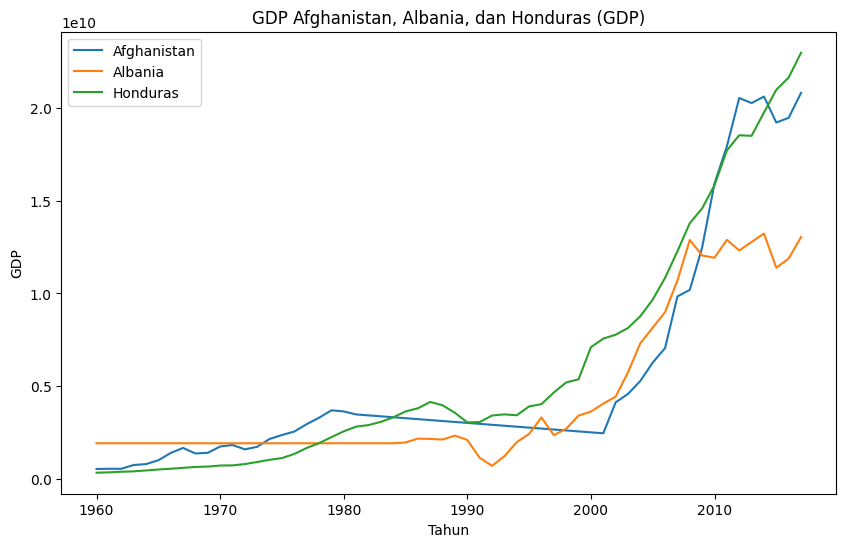

In [34]:
# Membuat plot untuk melihat data GDP untuk Afghanistan, Albania, dan Honduras
def plot_results(column_name):
    # Melakukan reshape data menjadi format long
    df_melt = pd.melt(d10, id_vars=['Country Name', 'Country Code', 'Indicator Name', 'Indicator Code'], var_name='year', value_name=column_name)
    # Mengubah kolom year menjadi tipe datetime
    df_melt['year'] = pd.to_datetime(df_melt['year'])
    
    # Plot hasil untuk Afghanistan, Albania, dan Honduras
    fig, ax = plt.subplots(figsize=(10, 6))
    
    countries = ['Afghanistan', 'Albania', 'Honduras']
    for country in countries:
        data = df_melt[df_melt['Country Name'] == country]
        ax.plot(data['year'], data[column_name], label=country)

    ax.set_xlabel('Tahun')
    ax.set_ylabel('GDP')
    ax.set_title(f'GDP Afghanistan, Albania, dan Honduras ({column_name})')
    ax.legend()

# Memanggil fungsi plot_results untuk membuat plot
plot_results('GDP')
plt.show()

## Mengecek kembali missing values

In [35]:
data_files = [
    ("projects_data.csv", d1),
    ("population_data.csv", d2),
    ("population_data.json", d3),
    ("population_data.xml", d4),
    ("population_data.db", d5),
    ("API", d6),
    ("rural_population_percent.csv", d7),
    ("electricity_access_percent.csv", d8),
    ("mystery.csv", d9),
    ("gdp_data.csv", d10)
]

for file_name, data in data_files:
    print(f"\n{file_name}:")
    missing_values = data.isnull().sum()
    print(missing_values)


projects_data.csv:
id                          0
regionname                  0
countryname                 0
prodline                    0
lendinginstr                0
lendinginstrtype            0
envassesmentcategorycode    0
supplementprojectflg        0
productlinetype             0
projectstatusdisplay        0
status                      0
project_name                0
boardapprovaldate           0
board_approval_month        0
closingdate                 0
lendprojectcost             0
ibrdcommamt                 0
idacommamt                  0
totalamt                    0
grantamt                    0
borrower                    0
impagency                   0
url                         0
sector1                     0
mjsector                    0
theme1                      0
goal                        0
dtype: int64

population_data.csv:
Country Name      0
Country Code      0
Indicator Name    0
Indicator Code    0
1960              0
                 ..
2013           

## Mengecek duplikasi data

In [36]:
datasets = [
    ("projects_data.csv", d1),
    ("population_data.csv", d2),
    ("population_data.json", d3),
    ("population_data.xml", d4),
    ("population_data.db", d5),
    ("API", d6),
    ("rural_population_percent.csv", d7),
    ("electricity_access_percent.csv", d8),
    ("mystery.csv", d9),
    ("gdp_data.csv", d10)
]

for file_name, dataset in datasets:
    duplicate_rows = dataset[dataset.duplicated(keep=False)]
    print(f"\nDuplikasi data di {file_name}:")
    display(duplicate_rows)



Duplikasi data di projects_data.csv:


,id,regionname,countryname,prodline,lendinginstr,lendinginstrtype,envassesmentcategorycode,supplementprojectflg,productlinetype,projectstatusdisplay,...,idacommamt,totalamt,grantamt,borrower,impagency,url,sector1,mjsector,theme1,goal



Duplikasi data di population_data.csv:


,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017



Duplikasi data di population_data.json:


,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017



Duplikasi data di population_data.xml:


,Country Name,Country Code,Indicator Name,Indicator Code,Year,Population



Duplikasi data di population_data.db:


,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017



Duplikasi data di API:


Year,Country Name,Country Code,2018,2019,2020,2021,2022,2023



Duplikasi data di rural_population_percent.csv:


,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017



Duplikasi data di electricity_access_percent.csv:


,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017



Duplikasi data di mystery.csv:


,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017



Duplikasi data di gdp_data.csv:


,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017


## Mengecek dummy variables

In [37]:
datasets = [
    ("projects_data.csv", d1),
    ("population_data.csv", d2),
    ("population_data.json", d3),
    ("population_data.xml", d4),
    ("population_data.db", d5),
    ("API", d6),
    ("rural_population_percent.csv", d7),
    ("electricity_access_percent.csv", d8),
    ("mystery.csv", d9),
    ("gdp_data.csv", d10)
]

for file_name, dataset in datasets:
    print(f"\n{file_name}:")
    for col in dataset.columns:
        if dataset[col].dtype == 'object':  # Memeriksa apakah kolom memiliki tipe data kategorikal
            print(f"Kolom: {col}")
            print(dataset[col].value_counts())
            print()


projects_data.csv:
Kolom: id


id
P162228    1
P005466    1
P000994    1
P000983    1
P000881    1
          ..
P104357    1
P104455    1
P097168    1
P100706    1
P037383    1
Name: count, Length: 18248, dtype: int64

Kolom: regionname
regionname
Africa                          5710
Latin America and Caribbean     3320
East Asia and Pacific           2910
Europe and Central Asia         2483
South Asia                      2223
Middle East and North Africa    1494
Other                            108
Name: count, dtype: int64

Kolom: countryname
countryname
Republic of India                           784
Republic of Indonesia                       571
People's Republic of China                  566
Federative Republic of Brazil               530
Islamic Republic of Pakistan                427
                                           ... 
Socialist People's Libyan Arab Jamahiriy      1
Antigua and Barbuda                           1
Multi-Regional                                1
Grand Duchy of Luxembourg         

## Melakukan dummy variables

In [38]:
# Mengubah kolom 'supplementprojectflg' menjadi dummy variables
d1['supplementprojectflg_dummy'] = pd.get_dummies(d1['supplementprojectflg'], drop_first=True)

# Menampilkan hasil
print("Data setelah mengubah kolom 'supplementprojectflg' menjadi dummy variables:")
print(d1[['supplementprojectflg', 'supplementprojectflg_dummy']].head(10))

# Menyimpan DataFrame ke file CSV pada staging_area
d1.to_csv("staging_area/projects_data_stag.csv", index=False)

Data setelah mengubah kolom 'supplementprojectflg' menjadi dummy variables:
  supplementprojectflg  supplementprojectflg_dummy
0                    N                       False
1                    N                       False
2                    Y                        True
3                    N                       False
4                    N                       False
5                    N                       False
6                    N                       False
7                    N                       False
8                    N                       False
9                    N                       False


## Melakukan feature engineering

### From population_data.xml

In [39]:
d4 = d4.pivot(index=['Country Name', 'Country Code', 'Indicator Name', 'Indicator Code'], columns='Year', values='Population').reset_index()

# Menyimpan DataFrame ke file CSV pada staging_area
d4.to_csv("staging_area/population_data_xml_stag.csv", index=False)

d4.head()

Year,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
0,Afghanistan,AFG,Population total,SP.POP.TOTL,8996351.0,9166764.0,9345868.0,9533954.0,9731361.0,9938414.0,...,27294031.0,28004331.0,28803167.0,29708599.0,30696958.0,31731688.0,32758020.0,33736494.0,34656032.0,35530081.0
1,Albania,ALB,Population total,SP.POP.TOTL,1608800.0,1659800.0,1711319.0,1762621.0,1814135.0,1864791.0,...,2947314.0,2927519.0,2913021.0,2905195.0,2900401.0,2895092.0,2889104.0,2880703.0,2876101.0,2873457.0
2,Algeria,DZA,Population total,SP.POP.TOTL,11124888.0,11404859.0,11690153.0,11985136.0,12295970.0,12626952.0,...,34860715.0,35465760.0,36117637.0,36819558.0,37565847.0,38338562.0,39113313.0,39871528.0,40606052.0,41318142.0
3,American Samoa,ASM,Population total,SP.POP.TOTL,20013.0,20486.0,21117.0,21882.0,22698.0,23520.0,...,57030.0,56227.0,55637.0,55320.0,55230.0,55307.0,55437.0,55537.0,55599.0,55641.0
4,Andorra,AND,Population total,SP.POP.TOTL,13411.0,14375.0,15370.0,16412.0,17469.0,18549.0,...,83861.0,84462.0,84449.0,83751.0,82431.0,80788.0,79223.0,78014.0,77281.0,76965.0


## Replace and regex

In [40]:
# Replace nilai "Viet Nam" dengan "Vietnam" menggunakan regex
d6["Country Name"] = d6["Country Name"].replace({"Viet Nam": "Vietnam"}, regex=True)

# Simpan DataFrame yang telah dimodifikasi ke file CSV baru
d6.to_csv("staging_area/api_stag.csv", index=False)

## Melakukan feature engineering API

### From population with API

In [41]:
d2.update(d3[d3['Country Name'].isin(d2['Country Name'])])
d2.update(d4[d4['Country Name'].isin(d2['Country Name'])])
d2.update(d5[d5['Country Name'].isin(d2['Country Name'])])
d2.update(d9[d9['Country Name'].isin(d2['Country Name'])])

In [42]:
combine = d2.merge(d6, on=['Country Name', 'Country Code'])

combine

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023
0,Aruba,ABW,Population total,SP.POP.TOTL,54211.0,55438.0,56225.0,56695.0,57032.0,57360.0,...,103795.0,104341.0,104822.0,105264.0,105962.0,106442.0,106585.0,106537.0,106445.0,106445.0
1,Afghanistan,AFG,Population total,SP.POP.TOTL,8996351.0,9166764.0,9345868.0,9533954.0,9731361.0,9938414.0,...,32758020.0,33736494.0,34656032.0,35530081.0,36686784.0,37769499.0,38972230.0,40099462.0,41128771.0,41128771.0
2,Angola,AGO,Population total,SP.POP.TOTL,5643182.0,5753024.0,5866061.0,5980417.0,6093321.0,6203299.0,...,26920466.0,27859305.0,28813463.0,29784193.0,31273533.0,32353588.0,33428486.0,34503774.0,35588987.0,35588987.0
3,Albania,ALB,Population total,SP.POP.TOTL,1608800.0,1659800.0,1711319.0,1762621.0,1814135.0,1864791.0,...,2889104.0,2880703.0,2876101.0,2873457.0,2866376.0,2854191.0,2837849.0,2811666.0,2777689.0,2777689.0
4,Andorra,AND,Population total,SP.POP.TOTL,13411.0,14375.0,15370.0,16412.0,17469.0,18549.0,...,79223.0,78014.0,77281.0,76965.0,75013.0,76343.0,77700.0,79034.0,79824.0,79824.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
250,Kosovo,XKX,Population total,SP.POP.TOTL,947000.0,966000.0,994000.0,1022000.0,1050000.0,1078000.0,...,1821800.0,1801800.0,1816200.0,1830700.0,1797085.0,1788878.0,1790133.0,1786038.0,1761985.0,1761985.0
251,Yemen Rep.,YEM,Population total,SP.POP.TOTL,5172135.0,5260501.0,5351799.0,5446063.0,5543339.0,5643643.0,...,26246327.0,26916207.0,27584213.0,28250420.0,30790513.0,31546691.0,32284046.0,32981641.0,33696614.0,33696614.0
252,South Africa,ZAF,Population total,SP.POP.TOTL,17456855.0,17920673.0,18401608.0,18899275.0,19412975.0,19942303.0,...,54539571.0,55291225.0,56015473.0,56717156.0,57339635.0,58087055.0,58801927.0,59392255.0,59893885.0,59893885.0
253,Zambia,ZMB,Population total,SP.POP.TOTL,3044846.0,3140264.0,3240587.0,3345145.0,3452942.0,3563407.0,...,15620974.0,16100587.0,16591390.0,17094130.0,17835893.0,18380477.0,18927715.0,19473125.0,20017675.0,20017675.0


In [43]:
# Melt kolom tahun menjadi satu kolom baru "Year"
combine = pd.melt(combine, 
                    id_vars=['Country Name', 'Country Code', 'Indicator Name', 'Indicator Code'], 
                    var_name='Year', 
                    value_name='Population')

# Konversi kolom 'Year' menjadi tipe data numerik
combine['Year'] = pd.to_numeric(combine['Year'])

# Urutkan DataFrame berdasarkan nama negara dan tahun
combine = combine.sort_values(by=['Country Name', 'Year'])

# Menyimpan DataFrame ke file CSV
combine.to_csv("data_combined/combined.csv", index=False)

### From rural with API

In [44]:
combine1 = d7.merge(d6, on=['Country Name', 'Country Code'])

combine1

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023
0,Aruba,ABW,Rural population (% of total population),SP.RUR.TOTL.ZS,49.224,49.239,49.254,49.270,49.285,49.300,...,58.221,58.472,58.696,58.893,105962.0,106442.0,106585.0,106537.0,106445.0,106445.0
1,Afghanistan,AFG,Rural population (% of total population),SP.RUR.TOTL.ZS,91.779,91.492,91.195,90.890,90.574,90.250,...,73.718,73.297,72.868,72.430,36686784.0,37769499.0,38972230.0,40099462.0,41128771.0,41128771.0
2,Angola,AGO,Rural population (% of total population),SP.RUR.TOTL.ZS,89.565,89.202,88.796,88.376,87.942,87.496,...,56.726,55.950,55.181,54.422,31273533.0,32353588.0,33428486.0,34503774.0,35588987.0,35588987.0
3,Albania,ALB,Rural population (% of total population),SP.RUR.TOTL.ZS,69.295,69.057,68.985,68.914,68.842,68.770,...,43.591,42.593,41.624,40.684,2866376.0,2854191.0,2837849.0,2811666.0,2777689.0,2777689.0
4,Andorra,AND,Rural population (% of total population),SP.RUR.TOTL.ZS,41.550,39.017,36.538,34.128,31.795,29.555,...,14.367,14.885,15.388,15.873,75013.0,76343.0,77700.0,79034.0,79824.0,79824.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
249,Kosovo,XKX,Rural population (% of total population),SP.RUR.TOTL.ZS,0.000,0.000,0.000,0.000,0.000,0.000,...,0.000,0.000,0.000,0.000,1797085.0,1788878.0,1790133.0,1786038.0,1761985.0,1761985.0
250,Yemen Rep.,YEM,Rural population (% of total population),SP.RUR.TOTL.ZS,90.900,90.541,90.169,89.784,89.386,88.974,...,65.973,65.394,64.813,64.231,30790513.0,31546691.0,32284046.0,32981641.0,33696614.0,33696614.0
251,South Africa,ZAF,Rural population (% of total population),SP.RUR.TOTL.ZS,53.381,53.207,53.094,52.980,52.866,52.752,...,35.702,35.199,34.705,34.218,57339635.0,58087055.0,58801927.0,59392255.0,59893885.0,59893885.0
252,Zambia,ZMB,Rural population (% of total population),SP.RUR.TOTL.ZS,81.855,81.049,80.215,79.288,77.985,76.628,...,59.528,59.078,58.621,58.160,17835893.0,18380477.0,18927715.0,19473125.0,20017675.0,20017675.0


In [45]:
# Melt kolom tahun menjadi satu kolom baru "Year"
combine1 = pd.melt(combine1, 
                    id_vars=['Country Name', 'Country Code', 'Indicator Name', 'Indicator Code'], 
                    var_name='Year', 
                    value_name='Ruralpopulationpercent')

# Konversi kolom 'Year' menjadi tipe data numerik
combine1['Year'] = pd.to_numeric(combine1['Year'])

# Urutkan DataFrame berdasarkan nama negara dan tahun
combine1 = combine1.sort_values(by=['Country Name', 'Year'])

# Menyimpan DataFrame ke file CSV
combine1.to_csv("data_combined/combined1.csv", index=False)

### From electricity with API

In [46]:
combine2 = d8.merge(d6, on=['Country Name', 'Country Code'])

combine2

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023
0,Aruba,ABW,Access to electricity (% of population),EG.ELC.ACCS.ZS,88.445351,88.445351,88.445351,88.445351,88.445351,88.445351,...,94.906723,95.238182,95.570145,95.570145,105962.0,106442.0,106585.0,106537.0,106445.0,106445.0
1,Afghanistan,AFG,Access to electricity (% of population),EG.ELC.ACCS.ZS,0.010000,0.010000,0.010000,0.010000,0.010000,0.010000,...,89.500000,71.500000,84.137138,84.137138,36686784.0,37769499.0,38972230.0,40099462.0,41128771.0,41128771.0
2,Angola,AGO,Access to electricity (% of population),EG.ELC.ACCS.ZS,11.397808,11.397808,11.397808,11.397808,11.397808,11.397808,...,32.000000,42.000000,40.520607,40.520607,31273533.0,32353588.0,33428486.0,34503774.0,35588987.0,35588987.0
3,Albania,ALB,Access to electricity (% of population),EG.ELC.ACCS.ZS,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,...,100.000000,100.000000,100.000000,100.000000,2866376.0,2854191.0,2837849.0,2811666.0,2777689.0,2777689.0
4,Andorra,AND,Access to electricity (% of population),EG.ELC.ACCS.ZS,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,...,100.000000,100.000000,100.000000,100.000000,75013.0,76343.0,77700.0,79034.0,79824.0,79824.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
249,Kosovo,XKX,Access to electricity (% of population),EG.ELC.ACCS.ZS,87.694695,87.694695,87.694695,87.694695,87.694695,87.694695,...,99.993134,100.000000,100.000000,100.000000,1797085.0,1788878.0,1790133.0,1786038.0,1761985.0,1761985.0
250,Yemen Rep.,YEM,Access to electricity (% of population),EG.ELC.ACCS.ZS,36.009098,36.009098,36.009098,36.009098,36.009098,36.009098,...,66.100000,70.213905,71.642349,71.642349,30790513.0,31546691.0,32284046.0,32981641.0,33696614.0,33696614.0
251,South Africa,ZAF,Access to electricity (% of population),EG.ELC.ACCS.ZS,59.337940,59.337940,59.337940,59.337940,59.337940,59.337940,...,86.000000,85.500000,84.200000,84.200000,57339635.0,58087055.0,58801927.0,59392255.0,59893885.0,59893885.0
252,Zambia,ZMB,Access to electricity (% of population),EG.ELC.ACCS.ZS,13.900000,13.900000,13.900000,13.900000,13.900000,13.900000,...,27.900000,31.100000,27.219337,27.219337,17835893.0,18380477.0,18927715.0,19473125.0,20017675.0,20017675.0


In [47]:
# Melt kolom tahun menjadi satu kolom baru "Year"
combine2 = pd.melt(combine2, 
                    id_vars=['Country Name', 'Country Code', 'Indicator Name', 'Indicator Code'], 
                    var_name='Year', 
                    value_name='Electricityaccesspercent')

# Konversi kolom 'Year' menjadi tipe data numerik
combine2['Year'] = pd.to_numeric(combine2['Year'])

# Urutkan DataFrame berdasarkan nama negara dan tahun
combine2 = combine2.sort_values(by=['Country Name', 'Year'])

# Menyimpan DataFrame ke file CSV
combine2.to_csv("data_combined/combined2.csv", index=False)

### From gdp with API

In [48]:
combine3 = d10.merge(d6, on=['Country Name', 'Country Code'])

combine3

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023
0,Aruba,ABW,GDP (current US$),NY.GDP.MKTP.CD,1.330168e+09,1.330168e+09,1.330168e+09,1.330168e+09,1.330168e+09,1.330168e+09,...,2.584464e+09,2.584464e+09,2.584464e+09,2.584464e+09,105962.0,106442.0,106585.0,106537.0,106445.0,106445.0
1,Afghanistan,AFG,GDP (current US$),NY.GDP.MKTP.CD,5.377778e+08,5.488889e+08,5.466667e+08,7.511112e+08,8.000000e+08,1.006667e+09,...,2.061610e+10,1.921556e+10,1.946902e+10,2.081530e+10,36686784.0,37769499.0,38972230.0,40099462.0,41128771.0,41128771.0
2,Angola,AGO,GDP (current US$),NY.GDP.MKTP.CD,5.934074e+09,5.934074e+09,5.934074e+09,5.934074e+09,5.934074e+09,5.934074e+09,...,1.267302e+11,1.026212e+11,9.533720e+10,1.242094e+11,31273533.0,32353588.0,33428486.0,34503774.0,35588987.0,35588987.0
3,Albania,ALB,GDP (current US$),NY.GDP.MKTP.CD,1.924242e+09,1.924242e+09,1.924242e+09,1.924242e+09,1.924242e+09,1.924242e+09,...,1.322824e+10,1.138693e+10,1.188368e+10,1.303935e+10,2866376.0,2854191.0,2837849.0,2811666.0,2777689.0,2777689.0
4,Andorra,AND,GDP (current US$),NY.GDP.MKTP.CD,7.861921e+07,7.861921e+07,7.861921e+07,7.861921e+07,7.861921e+07,7.861921e+07,...,3.350736e+09,2.811489e+09,2.877312e+09,3.012914e+09,75013.0,76343.0,77700.0,79034.0,79824.0,79824.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
249,Kosovo,XKX,GDP (current US$),NY.GDP.MKTP.CD,1.849196e+09,1.849196e+09,1.849196e+09,1.849196e+09,1.849196e+09,1.849196e+09,...,7.386891e+09,6.439947e+09,6.715487e+09,7.128691e+09,1797085.0,1788878.0,1790133.0,1786038.0,1761985.0,1761985.0
250,Yemen Rep.,YEM,GDP (current US$),NY.GDP.MKTP.CD,5.647252e+09,5.647252e+09,5.647252e+09,5.647252e+09,5.647252e+09,5.647252e+09,...,4.322858e+10,3.460248e+10,1.821333e+10,1.821333e+10,30790513.0,31546691.0,32284046.0,32981641.0,33696614.0,33696614.0
251,South Africa,ZAF,GDP (current US$),NY.GDP.MKTP.CD,7.575248e+09,7.972841e+09,8.497830e+09,9.423212e+09,1.037379e+10,1.133417e+10,...,3.509046e+11,3.177410e+11,2.957627e+11,3.494193e+11,57339635.0,58087055.0,58801927.0,59392255.0,59893885.0,59893885.0
252,Zambia,ZMB,GDP (current US$),NY.GDP.MKTP.CD,7.130000e+08,6.962857e+08,6.931429e+08,7.187143e+08,8.394286e+08,1.082857e+09,...,2.715063e+10,2.115439e+10,2.095475e+10,2.580867e+10,17835893.0,18380477.0,18927715.0,19473125.0,20017675.0,20017675.0


In [49]:
# Melt kolom tahun menjadi satu kolom baru "Year"
combine3 = pd.melt(combine3, 
                    id_vars=['Country Name', 'Country Code', 'Indicator Name', 'Indicator Code'], 
                    var_name='Year', 
                    value_name='Gdp')

# Konversi kolom 'Year' menjadi tipe data numerik
combine3['Year'] = pd.to_numeric(combine3['Year'])

# Urutkan DataFrame berdasarkan nama negara dan tahun
combine3 = combine3.sort_values(by=['Country Name', 'Year'])

# Menyimpan DataFrame ke file CSV
combine3.to_csv("data_combined/combined3.csv", index=False)

## Combine dataset

### Combine dataset

Data source:
- combined.csv
- combined1.csv
- combined2.csv
- combined3.csv

In [50]:
combined = pd.read_csv('data_combined/combined.csv')
combined1 = pd.read_csv('data_combined/combined1.csv')
combined2 = pd.read_csv('data_combined/combined2.csv')
combined3 = pd.read_csv('data_combined/combined3.csv')

# Menggabungkan dataset dengan inner join
merged_data = combined.merge(combined1, on=['Country Name', 'Country Code', 'Year'], suffixes=('_1', '_2')).merge(combined2,
                                        on=['Country Name', 'Country Code', 'Year'], suffixes=('_2', '_3')).merge(combined3,
                                        on=['Country Name', 'Country Code', 'Year'], suffixes=('_3', '_4'))

# Menyimpan hasil gabungan ke dalam file CSV
merged_data.to_csv('data_combined/combined4.csv', index=False)

In [51]:
# Menemukan baris yang duplikat
duplicate_rows = merged_data[merged_data.duplicated()]
print("Jumlah baris duplikat:", duplicate_rows.shape[0])

# Menemukan data yang hilang
missing_data = merged_data.isnull().sum()
print("\nData yang hilang:\n", missing_data)

Jumlah baris duplikat: 128

Data yang hilang:
 Country Name                0
Country Code                0
Indicator Name_1            0
Indicator Code_1            0
Year                        0
Population                  0
Indicator Name_2            0
Indicator Code_2            0
Ruralpopulationpercent      0
Indicator Name_3            0
Indicator Code_3            0
Electricityaccesspercent    0
Indicator Name_4            0
Indicator Code_4            0
Gdp                         0
dtype: int64


In [52]:
# Memilih kolom yang diperlukan
merged_data = merged_data[['Country Name', 'Country Code', 'Year', 'Population', 'Ruralpopulationpercent', 'Electricityaccesspercent', 'Gdp']]

# Menyimpan hasil pembaharuan ke dalam file CSV
merged_data.to_csv('data_combined/combined4.csv', index=False)

### Create gdppercapita

In [53]:
# Hitung GDP per kapita
merged_data['Gdppercapita'] = merged_data['Gdp'] / merged_data['Population']

# Menyimpan hasil gabungan ke dalam file CSV
merged_data.to_csv('data_combined/combined4.csv', index=False)

In [54]:
merged_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16320 entries, 0 to 16319
Data columns (total 8 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Country Name              16320 non-null  object 
 1   Country Code              16320 non-null  object 
 2   Year                      16320 non-null  int64  
 3   Population                16320 non-null  float64
 4   Ruralpopulationpercent    16320 non-null  float64
 5   Electricityaccesspercent  16320 non-null  float64
 6   Gdp                       16320 non-null  float64
 7   Gdppercapita              16320 non-null  float64
dtypes: float64(5), int64(1), object(2)
memory usage: 1020.1+ KB


In [55]:
merged_data['Population'] = merged_data['Population'].astype(int)

# Menyimpan hasil gabungan ke dalam file CSV
merged_data.to_csv('data_combined/combined4.csv', index=False)

merged_data.head(10)

,Country Name,Country Code,Year,Population,Ruralpopulationpercent,Electricityaccesspercent,Gdp,Gdppercapita
0,Afghanistan,AFG,1960,8996351,91.779,0.01,5.377778e+08,59.777327
1,Afghanistan,AFG,1961,9166764,91.492,0.01,5.488889e+08,59.878153
2,Afghanistan,AFG,1962,9345868,91.195,0.01,5.466667e+08,58.492874
3,Afghanistan,AFG,1963,9533954,90.890,0.01,7.511112e+08,78.782758
4,Afghanistan,AFG,1964,9731361,90.574,0.01,8.000000e+08,82.208444
5,Afghanistan,AFG,1965,9938414,90.250,0.01,1.006667e+09,101.290471
6,Afghanistan,AFG,1966,10152331,89.915,0.01,1.400000e+09,137.899362
7,Afghanistan,AFG,1967,10372630,89.570,0.01,1.673333e+09,161.322000
8,Afghanistan,AFG,1968,10604346,89.214,0.01,1.373333e+09,129.506654
9,Afghanistan,AFG,1969,10854428,88.848,0.01,1.408889e+09,129.798541


### Combine projects data

In [56]:
d7['Country Name'].tolist()

['Aruba',
 'Afghanistan',
 'Angola',
 'Albania',
 'Andorra',
 'Arab World',
 'United Arab Emirates',
 'Argentina',
 'Armenia',
 'American Samoa',
 'Antigua and Barbuda',
 'Australia',
 'Austria',
 'Azerbaijan',
 'Burundi',
 'Belgium',
 'Benin',
 'Burkina Faso',
 'Bangladesh',
 'Bulgaria',
 'Bahrain',
 'Bahamas The',
 'Bosnia and Herzegovina',
 'Belarus',
 'Belize',
 'Bermuda',
 'Bolivia',
 'Brazil',
 'Barbados',
 'Brunei Darussalam',
 'Bhutan',
 'Botswana',
 'Central African Republic',
 'Canada',
 'Central Europe and the Baltics',
 'Switzerland',
 'Channel Islands',
 'Chile',
 'China',
 "Cote d'Ivoire",
 'Cameroon',
 'Congo Dem. Rep.',
 'Congo Rep.',
 'Colombia',
 'Comoros',
 'Cabo Verde',
 'Costa Rica',
 'Caribbean small states',
 'Cuba',
 'Curacao',
 'Cayman Islands',
 'Cyprus',
 'Czech Republic',
 'Germany',
 'Djibouti',
 'Dominica',
 'Denmark',
 'Dominican Republic',
 'Algeria',
 'East Asia & Pacific (excluding high income)',
 'Early-demographic dividend',
 'East Asia & Pacific',
 

In [57]:
short_country_names = []

for idx, row in d1.iterrows():
    found_short_country = None

    for country_short in d7['Country Name']:
        if re.search(r'\b{}\b'.format(re.escape(country_short)), row['countryname']):
            found_short_country = country_short
            break

    short_country_names.append(found_short_country)


print(len(short_country_names))
print(short_country_names)

d1['countryname_short'] = short_country_names

18248
['World', None, 'Bangladesh', 'Afghanistan', 'Nigeria', 'Tunisia', 'Nigeria', 'Nigeria', 'Nigeria', None, None, 'Nigeria', 'Nepal', 'Nigeria', 'Kyrgyz Republic', 'Jordan', 'Myanmar', None, 'Tanzania', 'Ethiopia', 'Burkina Faso', 'Uzbekistan', 'Romania', 'Ethiopia', 'Ghana', 'Ecuador', 'Vietnam', 'China', 'Senegal', 'Grenada', 'Guyana', None, 'Indonesia', 'Kenya', 'Indonesia', 'Cambodia', 'Angola', 'India', 'China', None, 'Zambia', 'Kenya', None, 'Panama', 'Tunisia', 'Tonga', 'Pakistan', 'Pakistan', 'Bangladesh', 'Niger', 'Uganda', 'Madagascar', 'Bolivia', 'Afghanistan', 'China', 'Indonesia', None, 'Morocco', None, 'Djibouti', None, 'Maldives', 'Senegal', 'Indonesia', 'China', 'China', 'China', 'Central African Republic', 'India', None, 'Cabo Verde', "Cote d'Ivoire", 'Montenegro', 'Kyrgyz Republic', 'West Bank and Gaza', 'West Bank and Gaza', 'Ethiopia', 'Ghana', 'Haiti', 'Senegal', 'Guinea', 'Haiti', 'World', 'Samoa', 'Indonesia', None, None, 'Marshall Islands', 'Angola', 'Tunisi

In [58]:
d1[[
    'id', 'regionname', 'countryname', 'countryname_short', 'boardapprovaldate', 'lendprojectcost'
]]

,id,regionname,countryname,countryname_short,boardapprovaldate,lendprojectcost
0,P162228,Other,World,World,2018,500000
1,P163962,Africa,Democratic Republic of the Congo,None,2018,200000000
2,P167672,South Asia,People's Republic of Bangladesh,Bangladesh,2018,50000000
3,P158768,South Asia,Islamic Republic of Afghanistan,Afghanistan,2018,50000000
4,P161364,Africa,Federal Republic of Nigeria,Nigeria,2018,100000000
...,...,...,...,...,...,...
18243,P006578,Latin America and Caribbean,Republic of Chile,Chile,1948,13500000
18244,P037451,Europe and Central Asia,Grand Duchy of Luxembourg,Luxembourg,1947,12000000
18245,P037362,Europe and Central Asia,Kingdom of Denmark,Denmark,1947,40000000
18246,P037452,Europe and Central Asia,Kingdom of the Netherlands,Netherlands,1947,195000000


In [59]:
d1[
    d1['countryname_short'] == 'Vietnam'][
        ['id', 'regionname', 'countryname', 'countryname_short'
    ]
]

,id,regionname,countryname,countryname_short
26,P160162,East Asia and Pacific,Socialist Republic of Vietnam,Vietnam
106,P166158,East Asia and Pacific,Socialist Republic of Vietnam,Vietnam
121,P159976,East Asia and Pacific,Socialist Republic of Vietnam,Vietnam
315,P162792,East Asia and Pacific,Socialist Republic of Vietnam,Vietnam
448,P159737,East Asia and Pacific,Socialist Republic of Vietnam,Vietnam
...,...,...,...,...
16697,P162173,East Asia and Pacific,Socialist Republic of Vietnam,Vietnam
16832,P164410,East Asia and Pacific,Socialist Republic of Vietnam,Vietnam
16879,P164938,East Asia and Pacific,Socialist Republic of Vietnam,Vietnam
17101,P036944,East Asia and Pacific,Socialist Republic of Vietnam,Vietnam


In [60]:
project_data = merged_data[['Country Name', 'Year']]

# Merge dataframes
combine_project_data = d1.merge(
    project_data,
    how='right',
    left_on=['countryname_short', 'boardapprovaldate'],
    right_on=['Country Name', 'Year']
)[['Country Name', 'boardapprovaldate', 'lendprojectcost']]

# Sort the merged dataframe
combine_project_data = combine_project_data.sort_values(by=['Country Name', 'boardapprovaldate'])

combine_project_data

,Country Name,boardapprovaldate,lendprojectcost
4,Afghanistan,1964.0,3500000.0
9,Afghanistan,1969.0,5000000.0
10,Afghanistan,1970.0,5000000.0
11,Afghanistan,1971.0,5000000.0
13,Afghanistan,1973.0,11500000.0
...,...,...,...
25389,Zimbabwe,NaN,NaN
25390,Zimbabwe,NaN,NaN
25391,Zimbabwe,NaN,NaN
25392,Zimbabwe,NaN,NaN


In [61]:
combine_project_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 25394 entries, 4 to 25393
Data columns (total 3 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Country Name       25394 non-null  object 
 1   boardapprovaldate  12997 non-null  float64
 2   lendprojectcost    12997 non-null  float64
dtypes: float64(2), object(1)
memory usage: 793.6+ KB


In [62]:
combine_project_data = combine_project_data.fillna(0)
combine_project_data['boardapprovaldate'] = combine_project_data['boardapprovaldate'].astype(int)

combine_project_data

,Country Name,boardapprovaldate,lendprojectcost
4,Afghanistan,1964,3500000.0
9,Afghanistan,1969,5000000.0
10,Afghanistan,1970,5000000.0
11,Afghanistan,1971,5000000.0
13,Afghanistan,1973,11500000.0
...,...,...,...
25389,Zimbabwe,0,0.0
25390,Zimbabwe,0,0.0
25391,Zimbabwe,0,0.0
25392,Zimbabwe,0,0.0


In [63]:
# Memilih baris dengan boardapprovaldate dalam rentang tahun 1960-2023
combine_project_data = combine_project_data.loc[(combine_project_data['boardapprovaldate'] >= 1960) & (combine_project_data['boardapprovaldate'] <= 2023)]

# Reset indeks DataFrame
combine_project_data.reset_index(drop=True, inplace=True)
combine_project_data

,Country Name,boardapprovaldate,lendprojectcost
0,Afghanistan,1964,3500000.0
1,Afghanistan,1969,5000000.0
2,Afghanistan,1970,5000000.0
3,Afghanistan,1971,5000000.0
4,Afghanistan,1973,11500000.0
...,...,...,...
12992,Zimbabwe,2015,2000000.0
12993,Zimbabwe,2016,1900000.0
12994,Zimbabwe,2016,20800000.0
12995,Zimbabwe,2016,20000000.0


In [64]:
combine_project_data[['Country Name']].nunique()

Country Name    144
dtype: int64

In [65]:
combine_project_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12997 entries, 0 to 12996
Data columns (total 3 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Country Name       12997 non-null  object 
 1   boardapprovaldate  12997 non-null  int32  
 2   lendprojectcost    12997 non-null  float64
dtypes: float64(1), int32(1), object(1)
memory usage: 254.0+ KB


In [66]:
merged_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16320 entries, 0 to 16319
Data columns (total 8 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Country Name              16320 non-null  object 
 1   Country Code              16320 non-null  object 
 2   Year                      16320 non-null  int64  
 3   Population                16320 non-null  int32  
 4   Ruralpopulationpercent    16320 non-null  float64
 5   Electricityaccesspercent  16320 non-null  float64
 6   Gdp                       16320 non-null  float64
 7   Gdppercapita              16320 non-null  float64
dtypes: float64(4), int32(1), int64(1), object(2)
memory usage: 956.4+ KB


In [67]:
final = combine_project_data.merge(
    merged_data,
    how='right',
    left_on=['Country Name', 'boardapprovaldate'],
    right_on=['Country Name', 'Year'])[['Country Name', 'Country Code', 'Year', 'Gdp', 'Population', 'Gdppercapita',
                       'Ruralpopulationpercent', 'Electricityaccesspercent', 'lendprojectcost']]

final

,Country Name,Country Code,Year,Gdp,Population,Gdppercapita,Ruralpopulationpercent,Electricityaccesspercent,lendprojectcost
0,Afghanistan,AFG,1960,5.377778e+08,8996351,59.777327,9.177900e+01,0.01,NaN
1,Afghanistan,AFG,1961,5.488889e+08,9166764,59.878153,9.149200e+01,0.01,NaN
2,Afghanistan,AFG,1962,5.466667e+08,9345868,58.492874,9.119500e+01,0.01,NaN
3,Afghanistan,AFG,1963,7.511112e+08,9533954,78.782758,9.089000e+01,0.01,NaN
4,Afghanistan,AFG,1964,8.000000e+08,9731361,82.208444,9.057400e+01,0.01,3500000.0
...,...,...,...,...,...,...,...,...,...
25525,Zimbabwe,ZWE,2019,1.535461e+07,15354608,1.000000,1.535461e+07,15354608.00,NaN
25526,Zimbabwe,ZWE,2020,1.566967e+07,15669666,1.000000,1.566967e+07,15669666.00,NaN
25527,Zimbabwe,ZWE,2021,1.599352e+07,15993524,1.000000,1.599352e+07,15993524.00,NaN
25528,Zimbabwe,ZWE,2022,1.632054e+07,16320537,1.000000,1.632054e+07,16320537.00,NaN


In [68]:
# Menjumlahkan lendprojectcost berdasarkan kolom yang duplicated
final = final.groupby(['Country Name', 'Country Code', 'Year', 'Population', 'Gdp',
                             'Gdppercapita', 'Ruralpopulationpercent', 'Electricityaccesspercent']
                            )['lendprojectcost'].sum().reset_index()

# Menghapus baris yang duplikat setelah dijumlahkan, hanya menyisakan satu baris
final.drop_duplicates(subset=['Country Name', 'Country Code', 'Year'], keep='first', inplace=True)

final

,Country Name,Country Code,Year,Population,Gdp,Gdppercapita,Ruralpopulationpercent,Electricityaccesspercent,lendprojectcost
0,Afghanistan,AFG,1960,8996351,5.377778e+08,59.777327,9.177900e+01,0.01,0.0
1,Afghanistan,AFG,1961,9166764,5.488889e+08,59.878153,9.149200e+01,0.01,0.0
2,Afghanistan,AFG,1962,9345868,5.466667e+08,58.492874,9.119500e+01,0.01,0.0
3,Afghanistan,AFG,1963,9533954,7.511112e+08,78.782758,9.089000e+01,0.01,0.0
4,Afghanistan,AFG,1964,9731361,8.000000e+08,82.208444,9.057400e+01,0.01,3500000.0
...,...,...,...,...,...,...,...,...,...
16187,Zimbabwe,ZWE,2019,15354608,1.535461e+07,1.000000,1.535461e+07,15354608.00,0.0
16188,Zimbabwe,ZWE,2020,15669666,1.566967e+07,1.000000,1.566967e+07,15669666.00,0.0
16189,Zimbabwe,ZWE,2021,15993524,1.599352e+07,1.000000,1.599352e+07,15993524.00,0.0
16190,Zimbabwe,ZWE,2022,16320537,1.632054e+07,1.000000,1.632054e+07,16320537.00,0.0


In [69]:
final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16192 entries, 0 to 16191
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Country Name              16192 non-null  object 
 1   Country Code              16192 non-null  object 
 2   Year                      16192 non-null  int64  
 3   Population                16192 non-null  int32  
 4   Gdp                       16192 non-null  float64
 5   Gdppercapita              16192 non-null  float64
 6   Ruralpopulationpercent    16192 non-null  float64
 7   Electricityaccesspercent  16192 non-null  float64
 8   lendprojectcost           16192 non-null  float64
dtypes: float64(5), int32(1), int64(1), object(2)
memory usage: 1.1+ MB


In [70]:
# Mengganti nama kolom dan mengurutkan kolom sesuai instruksi github
final.rename(columns={'Country Name': 'countryname', 'Country Code': 'countrycode', 'Year': 'year', 'Population': 'population', 
                      'Gdp': 'gdp', 'Gdppercapita': 'gdppercapita', 'Ruralpopulationpercent': 'ruralpopulationpercent', 
                      'Electricityaccesspercent': 'electricityaccesspercent', 'lendprojectcost': 'projectcost'}, inplace=True)

final = final[['countryname', 'countrycode', 'year', 'gdp', 'population', 'gdppercapita', 'ruralpopulationpercent', 'electricityaccesspercent', 'projectcost']]

final.head()

,countryname,countrycode,year,gdp,population,gdppercapita,ruralpopulationpercent,electricityaccesspercent,projectcost
0,Afghanistan,AFG,1960,5.377778e+08,8996351,59.777327,91.779,0.01,0.0
1,Afghanistan,AFG,1961,5.488889e+08,9166764,59.878153,91.492,0.01,0.0
2,Afghanistan,AFG,1962,5.466667e+08,9345868,58.492874,91.195,0.01,0.0
3,Afghanistan,AFG,1963,7.511112e+08,9533954,78.782758,90.890,0.01,0.0
4,Afghanistan,AFG,1964,8.000000e+08,9731361,82.208444,90.574,0.01,3500000.0


In [71]:
# Menyimpan hasil gabungan dataset ke dalam file CSV
final.to_csv('data_final/final_data.csv', index=False)

## Outliers

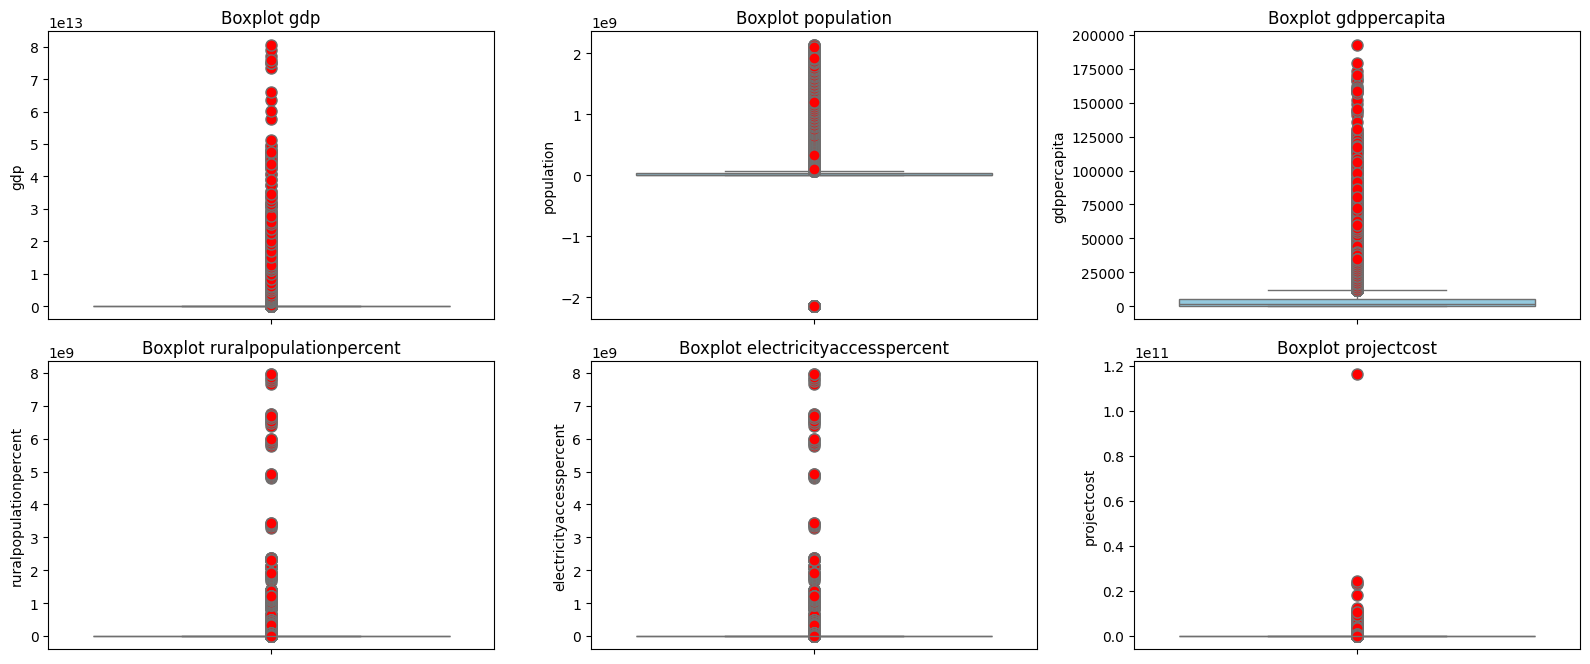

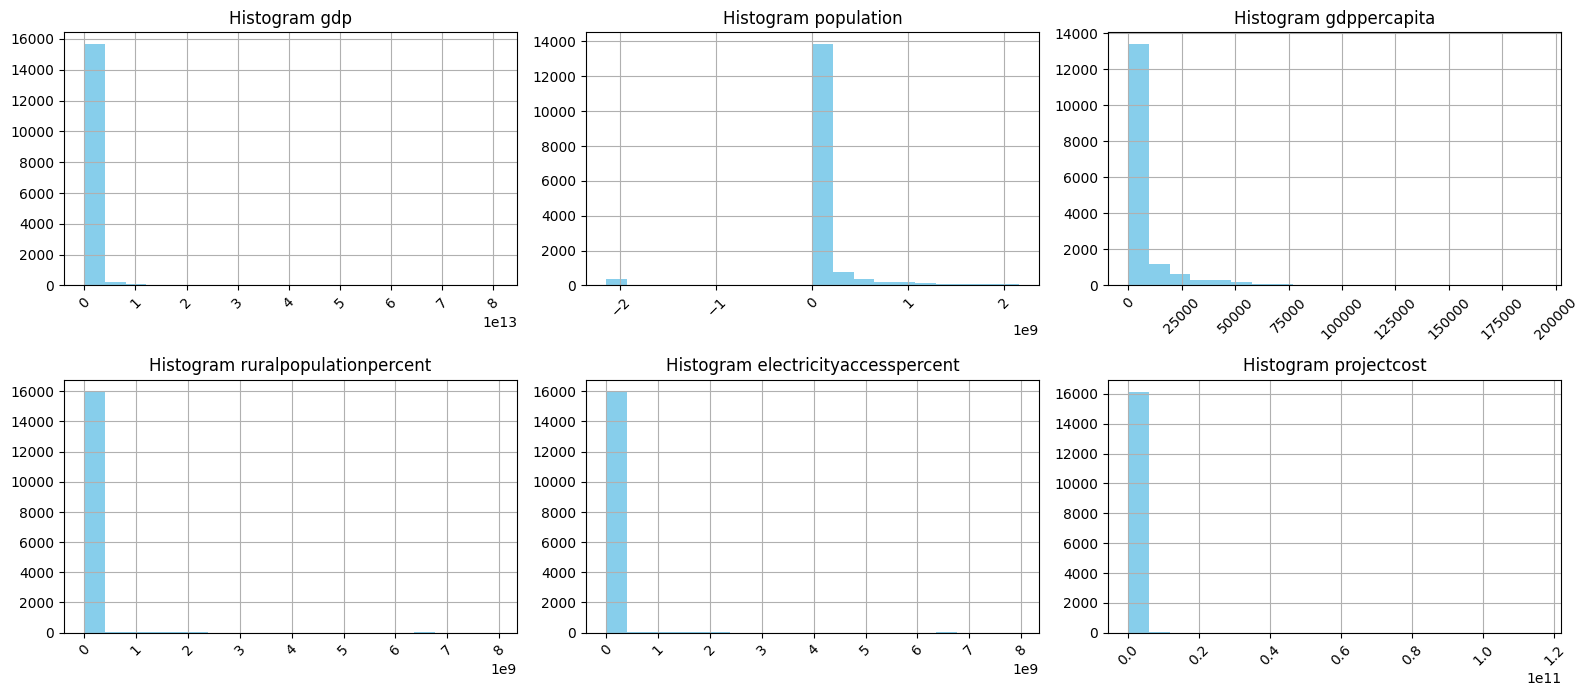

Outliers for gdp:
      countryname countrycode  year           gdp  population  gdppercapita  \
176       Algeria         DZA  2008  1.710007e+11    34860715   4905.254866   
179       Algeria         DZA  2011  2.000191e+11    36819558   5432.413320   
180       Algeria         DZA  2012  2.090590e+11    37565847   5565.134521   
181       Algeria         DZA  2013  2.097550e+11    38338562   5471.123389   
182       Algeria         DZA  2014  2.138100e+11    39113313   5466.425778   
...           ...         ...   ...           ...         ...           ...   
15989       World         WLD  2013  7.705059e+13 -2147483648  10723.606658   
15990       World         WLD  2014  7.913144e+13 -2147483648  10882.675158   
15991       World         WLD  2015  7.484273e+13 -2147483648  10172.222817   
15992       World         WLD  2016  7.593681e+13 -2147483648  10200.860601   
15993       World         WLD  2017  8.068379e+13 -2147483648  10714.465954   

       ruralpopulationpercent  el

In [72]:
# Memfilter data berdasarkan rentang tahun 1960 - 2023
final = final[(final['year'] >= 1960) & (final['year'] <= 2023)]

# Mendefinisikan kolom yang akan dianalisis
columns_to_analyze = ['gdp', 'population', 'gdppercapita', 'ruralpopulationpercent', 'electricityaccesspercent', 'projectcost']

# Membuat boxplot untuk setiap kolom
plt.figure(figsize=(16, 10))
for i, column in enumerate(columns_to_analyze, 1):
    plt.subplot(3, 3, i)
    sns.boxplot(data=final, y=column, color='skyblue', flierprops=dict(marker='o', markerfacecolor='red', markersize=8))
    plt.title(f'Boxplot {column}')
    plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Membuat histogram untuk setiap kolom
plt.figure(figsize=(16, 10))
for i, column in enumerate(columns_to_analyze, 1):
    plt.subplot(3, 3, i)
    final[column].hist(bins=20, color='skyblue')
    plt.title(f'Histogram {column}')
    plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Mencari outlier menggunakan metode IQR
outliers = {}
for column in columns_to_analyze:
    Q1 = final[column].quantile(0.25)
    Q3 = final[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers[column] = final[(final[column] < lower_bound) | (final[column] > upper_bound)]

# Menampilkan data outlier
for column, outlier_df in outliers.items():
    if not outlier_df.empty:
        print(f"Outliers for {column}:")
        print(outlier_df)
        print('\n')

## Scaling feature

In [73]:
# Membaca dataset
df1 = pd.read_csv('data_final/final_data.csv')

# Memilih fitur untuk scaling
features_to_scale = ['gdp', 'population', 'gdppercapita', 'ruralpopulationpercent', 'electricityaccesspercent', 'projectcost']

# Membuat objek StandardScaler
scaler = StandardScaler()

# Melakukan scaling pada fitur-fitur yang dipilih
df1[features_to_scale] = scaler.fit_transform(df1[features_to_scale])

# Menyimpan dataset yang telah di-scaled
df1.to_csv('data_scaled/data_scaled.csv', index=False)

df1

,countryname,countrycode,year,gdp,population,gdppercapita,ruralpopulationpercent,electricityaccesspercent,projectcost
0,Afghanistan,AFG,1960,-0.181160,-0.100703,-0.442207,-0.087797,-0.087797,-0.086027
1,Afghanistan,AFG,1961,-0.181157,-0.100323,-0.442201,-0.087797,-0.087797,-0.086027
2,Afghanistan,AFG,1962,-0.181158,-0.099925,-0.442293,-0.087797,-0.087797,-0.086027
3,Afghanistan,AFG,1963,-0.181102,-0.099506,-0.440940,-0.087797,-0.087797,-0.086027
4,Afghanistan,AFG,1964,-0.181089,-0.099066,-0.440712,-0.087797,-0.087797,-0.082846
...,...,...,...,...,...,...,...,...,...
16187,Zimbabwe,ZWE,2019,-0.181303,-0.086544,-0.446126,-0.038852,-0.038852,-0.086027
16188,Zimbabwe,ZWE,2020,-0.181303,-0.085842,-0.446126,-0.037848,-0.037848,-0.086027
16189,Zimbabwe,ZWE,2021,-0.181303,-0.085121,-0.446126,-0.036815,-0.036815,-0.086027
16190,Zimbabwe,ZWE,2022,-0.181303,-0.084393,-0.446126,-0.035773,-0.035773,-0.086027


# LOAD

In [74]:
# Load environment variables from .env file
load_dotenv()

# Initialize Firebase Admin SDK
cred = credentials.Certificate(os.getenv('SERVICE_ACCOUNT_KEY_PATH'))
initialize_app(cred, {'storageBucket': os.getenv('STORAGE_BUCKET')})

# Function to extract data from CSV file
def extract_data(csv_file):
    data = pd.read_csv(csv_file)
    return data

# Function to upload data to Google Storage Firebase in CSV format
def load_data_to_gcs(data, bucket_name, file_name):
    bucket = storage.bucket(bucket_name)
    blob = bucket.blob(file_name)
    data.to_csv(file_name, index=False)
    blob.upload_from_filename(file_name)

# Main function
def main():
    # CSV file name
    csv_file = 'data_final/final_data.csv'
    # Google Storage Firebase bucket name
    bucket_name = os.getenv('STORAGE_BUCKET')
    # File name to be stored in Google Storage Firebase
    file_name = 'final_data.csv'

    # Extract data from CSV file
    data = extract_data(csv_file)
    # Upload the data to Google Storage Firebase
    load_data_to_gcs(data, bucket_name, file_name)

if __name__ == "__main__":
    main()

# DATA VISUALIZATION

## Data population final_data.csv

In [75]:
# Filter data untuk negara ASEAN
asean_countries = ['Indonesia', 'Thailand', 'Malaysia', 'Singapore', 'Philippines', 'Vietnam', 'Myanmar', 'Cambodia', 'Brunei Darussalam', 'Lao PDR', 'Timor-Leste']
df_asean = final[final['countryname'].isin(asean_countries)]

# Visualisasi 1: GDP per Capita tiap Negara dalam rentang tahun
fig1 = px.line(df_asean, x='year', y='gdppercapita', color='countryname', 
               title='GDP per Capita ASEAN Countries Over Time')

# Visualisasi 2: Populasi tiap Negara dalam rentang tahun
fig2 = px.line(df_asean, x='year', y='population', color='countryname', 
               title='Population of ASEAN Countries Over Time')

# Visualisasi 3: Persentase Populasi Pedesaan tiap Negara dalam rentang tahun
fig3 = px.line(df_asean, x='year', y='ruralpopulationpercent', color='countryname', 
               title='Rural Population Percentage of ASEAN Countries Over Time')

# Visualisasi 4: Persentase Akses Listrik tiap Negara dalam rentang tahun
fig4 = px.line(df_asean, x='year', y='electricityaccesspercent', color='countryname', 
               title='Electricity Access Percentage of ASEAN Countries Over Time')

# Visualisasi 5: Jumlah Proyek tiap Negara dalam rentang tahun
fig5 = px.line(df_asean, x='year', y='projectcost', color='countryname', 
               title='Project Cost of ASEAN Countries Over Time')

# Visualisasi 6: GDP tiap Negara dalam rentang tahun
fig6 = px.line(df_asean, x='year', y='gdp', color='countryname', 
               title='GDP of ASEAN Countries Over Time')

# Visualisasi 7: GDP vs Populasi tiap Negara dalam scatter plot
fig7 = px.scatter(df_asean, x='gdp', y='population', color='countryname', 
                  title='GDP vs Population of ASEAN Countries')

# Visualisasi 8: Proyek Cost vs GDP tiap Negara dalam scatter plot
fig8 = px.scatter(df_asean, x='projectcost', y='gdp', color='countryname', 
                   title='Project Cost vs GDP of ASEAN Countries')

# Tampilkan visualisasi
fig1.show()
fig2.show()
fig3.show()
fig4.show()
fig5.show()
fig6.show()
fig7.show()
fig8.show()

In [76]:
# Menyeleksi data untuk negara ASEAN
asean_countries = ['Indonesia', 'Thailand', 'Malaysia', 'Singapore', 'Philippines', 'Vietnam', 'Myanmar', 'Cambodia', 'Brunei Darussalam', 'Lao PDR', 'Timor-Leste']
df_asean = final[final['countryname'].isin(asean_countries)]

# Membuat visualisasi menggunakan Plotly Express
fig = px.scatter(df_asean, x='year', y='gdp', color='countryname', 
                 size='population', hover_data=['gdppercapita', 'ruralpopulationpercent', 'electricityaccesspercent', 'projectcost'], 
                 title='Data Negara ASEAN', 
                 labels={'year': 'Tahun', 'gdp': 'GDP', 'population': 'Populasi', 'gdppercapita': 'GDP per Kapita', 
                         'ruralpopulationpercent': 'Persentase Populasi Pedesaan', 'electricityaccesspercent': 'Akses Listrik (%)', 
                         'projectcost': 'Biaya Proyek'})

fig.show()

In [77]:
# Memilih data negara ASEAN
asean_countries = ['Indonesia', 'Thailand', 'Malaysia', 'Singapore', 'Philippines', 'Vietnam', 'Myanmar', 'Cambodia', 'Brunei Darussalam', 'Lao PDR', 'Timor-Leste']
df_asean = final[final['countryname'].isin(asean_countries)]

# Analisis Distribusi menggunakan Box Plot
box_plot = px.box(df_asean, x='countryname', y='gdp', title='Distribusi GDP Negara ASEAN', color='countryname')

box_plot.show()

In [78]:
# Menyeleksi data untuk negara ASEAN
asean_countries = ['Indonesia', 'Thailand', 'Malaysia', 'Singapore', 'Philippines', 'Vietnam', 'Myanmar', 'Cambodia', 'Brunei Darussalam', 'Lao PDR', 'Timor-Leste']
df_asean = final[final['countryname'].isin(asean_countries)]

# Pilih tahun yang ingin ditampilkan
tahun_terpilih = 2017
df_tahun_terpilih = df_asean[df_asean['year'] == tahun_terpilih]

# Membuat peta interaktif menggunakan Plotly Express
fig = px.choropleth(df_tahun_terpilih, 
                    locations='countrycode', 
                    color='gdp',
                    hover_name='countryname',
                    hover_data=['gdppercapita', 'population'],
                    color_continuous_scale=px.colors.sequential.Plasma,
                    title=f'GDP Negara ASEAN Tahun {tahun_terpilih}',
                    labels={'gdp': 'GDP', 'countryname': 'Negara', 'gdppercapita': 'GDP per Kapita', 'population': 'Populasi'})

fig.update_geos(showcountries=True, countrycolor="Black", showcoastlines=True, coastlinecolor="Black", showland=True, landcolor="LightGrey")
fig.update_layout(geo=dict(bgcolor= 'rgba(0,0,0,0)'))
fig.show()


In [82]:
# Menyeleksi data untuk negara ASEAN
asean_countries = ['Indonesia', 'Thailand', 'Malaysia', 'Singapore', 'Philippines', 'Vietnam', 'Myanmar', 'Cambodia', 'Brunei Darussalam', 'Lao PDR', 'Timor-Leste']
df_asean = final[final['countryname'].isin(asean_countries)]

# Pilih tahun yang ingin ditampilkan
tahun_terpilih = 2017
df_tahun_terpilih = df_asean[df_asean['year'] == tahun_terpilih]

# Membuat visualisasi menggunakan Plotly Express
fig = px.scatter_3d(df_tahun_terpilih, 
                    x='gdppercapita', 
                    y='ruralpopulationpercent', 
                    z='electricityaccesspercent', 
                    color='countryname',
                    size='population',
                    hover_name='countryname',
                    title=f'Hubungan Antara GDP per Kapita, Persentase Populasi Pedesaan, dan Akses Listrik Negara ASEAN Tahun {tahun_terpilih}',
                    labels={'gdppercapita': 'GDP per Kapita', 'ruralpopulationpercent': 'Persentase Populasi Pedesaan', 'electricityaccesspercent': 'Akses Listrik (%)', 'countryname': 'Negara'},
                    size_max=50)

fig.show()


## Data project_data.csv

In [80]:
# Membuat urutan bulan yang benar
month_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']

# Menyusun kolom board_approval_month sesuai urutan bulan
d1['board_approval_month'] = pd.Categorical(d1['board_approval_month'], categories=month_order, ordered=True)

# Menghitung jumlah persetujuan per bulan
month_counts = d1['board_approval_month'].value_counts().reindex(month_order).reset_index()
month_counts.columns = ['board_approval_month', 'count']

# Membuat bar plot menggunakan Plotly Express
fig = px.bar(month_counts, x='board_approval_month', y='count', 
             title='Distribution of Project Approvals by Month', 
             labels={'board_approval_month': 'Month', 'count': 'Number of Approvals'})

# Menampilkan plot
fig.update_layout(xaxis_tickangle=-45)  # Memutar label bulan agar tidak saling tumpang tindih
fig.show()

In [81]:
# Menghitung frekuensi setiap status
status_counts = d1['projectstatusdisplay'].value_counts()

# Membuat DataFrame dari frekuensi
status_df = pd.DataFrame({'Status': status_counts.index, 'Counts': status_counts.values})

# Membuat bar plot menggunakan Plotly Express
fig = px.bar(status_df, x='Status', y='Counts', 
             title='Project Status Distribution', 
             labels={'Status': 'Project Status', 'Counts': 'Counts'}, 
             color='Status', color_discrete_sequence=['blue', 'green', 'red', 'purple'])

# Menampilkan plot
fig.show()
